In [1]:
import pandas as pd
import numpy as np

file_path = 'Manhattan12.csv'
df = pd.read_csv(file_path)

df.shape

(27399, 21)

In [2]:
df.head()

ï»¿Manhattan Rolling Sales File.  All Sales From August 2012 - August 2013.  \
0  Sales File as of 08/30/2013  Coop Sales Files ...                            
1  Neighborhood Name 09/06/13, Descriptive Data i...                            
2  Building Class Category is based on Building C...                            
3                                            BOROUGH                            
4                                                  1                            

     Unnamed: 1                        Unnamed: 2            Unnamed: 3  \
0           NaN                               NaN                   NaN   
1           NaN                               NaN                   NaN   
2           NaN                               NaN                   NaN   
3  NEIGHBORHOOD           BUILDING CLASS CATEGORY  TAX CLASS AT PRESENT   
4           NaN  13  CONDOS - ELEVATOR APARTMENTS                   NaN   

  Unnamed: 4 Unnamed: 5 Unnamed: 6                 Unnamed: 7  \
0        NaN        NaN        NaN                        NaN   
1        NaN        NaN        NaN                        NaN   
2        NaN        NaN        NaN                        NaN   
3      BLOCK        LOT  EASE-MENT  BUILDING CLASS AT PRESENT   
4        738       1306        NaN                        NaN   

               Unnamed: 8           Unnamed: 9  ...        Unnamed: 11  \
0                     NaN                  NaN  ...                NaN   
1                     NaN                  NaN  ...                NaN   
2                     NaN                  NaN  ...                NaN   
3                 ADDRESS  APART\nMENT\nNUMBER  ...  RESIDENTIAL UNITS   
4  345 WEST 14TH   STREET                  NaN  ...                  0   

        Unnamed: 12  Unnamed: 13       Unnamed: 14        Unnamed: 15  \
0               NaN          NaN               NaN                NaN   
1               NaN          NaN               NaN                NaN   
2               NaN          NaN               NaN                NaN   
3  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET   
4                 0            0                 0                  0   

  Unnamed: 16                Unnamed: 17                     Unnamed: 18  \
0         NaN                        NaN                             NaN   
1         NaN                        NaN                             NaN   
2         NaN                        NaN                             NaN   
3  YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE   
4           0                          2                              R4   

   Unnamed: 19 Unnamed: 20  
0          NaN         NaN  
1          NaN         NaN  
2          NaN         NaN  
3  SALE\nPRICE   SALE DATE  
4   $2,214,693  20/05/2013  

[5 rows x 21 columns]

The dataset appears to have some header rows that are not relevant to the actual data. The actual column names seem to be in the fourth row (index 3), and the data starts from the fifth row (index 4).

In [3]:
df = pd.read_csv(file_path, skiprows=4)

df.head()

BOROUGH NEIGHBORHOOD           BUILDING CLASS CATEGORY  \
0        1          NaN  13  CONDOS - ELEVATOR APARTMENTS   
1        1          NaN  13  CONDOS - ELEVATOR APARTMENTS   
2        1          NaN  13  CONDOS - ELEVATOR APARTMENTS   
3        1          NaN  13  CONDOS - ELEVATOR APARTMENTS   
4        1          NaN  13  CONDOS - ELEVATOR APARTMENTS   

  TAX CLASS AT PRESENT  BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT  \
0                  NaN    738  1306        NaN                       NaN   
1                  NaN    738  1307        NaN                       NaN   
2                  NaN    738  1308        NaN                       NaN   
3                  NaN    738  1309        NaN                       NaN   
4                  NaN    738  1310        NaN                       NaN   

                  ADDRESS APART\nMENT\nNUMBER  ...  RESIDENTIAL UNITS  \
0  345 WEST 14TH   STREET                 NaN  ...                  0   
1  345 WEST 14TH   STREET                 NaN  ...                  0   
2  345 WEST 14TH   STREET                 NaN  ...                  0   
3  345 WEST 14TH   STREET                 NaN  ...                  0   
4  345 WEST 14TH   STREET                 NaN  ...                  0   

  COMMERCIAL UNITS  TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET YEAR BUILT  \
0                0            0                0                 0          0   
1                0            0                0                 0          0   
2                0            0                0                 0          0   
3                0            0                0                 0          0   
4                0            0                0                 0          0   

   TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE SALE\nPRICE  \
0                          2                              R4  $2,214,693   
1                          2                              R4  $1,654,656   
2                          2                              R4  $1,069,162   
3                          2                              R4  $1,374,637   
4                          2                              R4  $1,649,565   

    SALE DATE  
0  20/05/2013  
1  16/05/2013  
2  23/05/2013  
3  15/05/2013  
4  13/05/2013  

[5 rows x 21 columns]

#### renaming the columns

In [4]:
df.columns = df.columns.str.replace('\n', ' ').str.strip()

df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APART MENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

#### Creating a list of categorical and numerical data

In [5]:
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print(f'Cat vars: {categorical_vars}')
print(f'Num vars: {numerical_vars}')

Cat vars: ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APART MENT NUMBER', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']
Num vars: ['BOROUGH', 'BLOCK', 'LOT', 'EASE-MENT', 'ZIP CODE', 'COMMERCIAL UNITS', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE']


#### Converting numerical columns to numeric format

In [6]:
to_be_converted = ['SALE PRICE', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

for col in to_be_converted:
    df[col] = pd.to_numeric(df[col].str.replace('[\$,]', '', regex=True), errors='coerce')

df[to_be_converted].dtypes

SALE PRICE           int64
RESIDENTIAL UNITS    int64
TOTAL UNITS          int64
LAND SQUARE FEET     int64
GROSS SQUARE FEET    int64
dtype: object

#### Converting "SALE DATE" Column to datetime

In [7]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

df['SALE DATE'].dtypes

/tmp/ipykernel_353924/3840742004.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')


dtype('<M8[ns]')

#### Cleaning categorical variables 

In [8]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().replace('', np.nan)
    
df[df.select_dtypes(include=['object']).columns].head()

NEIGHBORHOOD           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0          NaN  13  CONDOS - ELEVATOR APARTMENTS                  NaN   
1          NaN  13  CONDOS - ELEVATOR APARTMENTS                  NaN   
2          NaN  13  CONDOS - ELEVATOR APARTMENTS                  NaN   
3          NaN  13  CONDOS - ELEVATOR APARTMENTS                  NaN   
4          NaN  13  CONDOS - ELEVATOR APARTMENTS                  NaN   

  BUILDING CLASS AT PRESENT                 ADDRESS APART MENT NUMBER  \
0                       NaN  345 WEST 14TH   STREET               NaN   
1                       NaN  345 WEST 14TH   STREET               NaN   
2                       NaN  345 WEST 14TH   STREET               NaN   
3                       NaN  345 WEST 14TH   STREET               NaN   
4                       NaN  345 WEST 14TH   STREET               NaN   

  BUILDING CLASS AT TIME OF SALE  
0                             R4  
1                             R4  
2                             R4  
3                             R4  
4                             R4

####  replacing zeros in numerical columns like 'SALE PRICE', 'LAND SQUARE FEET', etc., with NaN values.

In [9]:
cols_to_replace_zeros = ['SALE PRICE', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
df[cols_to_replace_zeros] = df[cols_to_replace_zeros].replace(0, np.nan)

#### summary of all missing values

In [10]:
missing_values_summary = df.isna().sum()

In [11]:
missing_values_summary

BOROUGH                               0
NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            3454
TAX CLASS AT PRESENT                143
BLOCK                                 0
LOT                                   0
EASE-MENT                         27395
BUILDING CLASS AT PRESENT           143
ADDRESS                               0
APART MENT NUMBER                 14570
ZIP CODE                              0
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                      0
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         7593
SALE DATE                             0
dtype: int64

#### summary statistics

In [12]:
summary_statistics = df.describe()

summary_statistics

BOROUGH         BLOCK           LOT  EASE-MENT      ZIP CODE  \
count  27395.0  27395.000000  27395.000000        0.0  27395.000000   
mean       1.0   1109.666728    741.789086        NaN  10028.860120   
min        1.0      7.000000      1.000000        NaN      0.000000   
25%        1.0    877.000000     37.000000        NaN  10016.000000   
50%        1.0   1047.000000   1007.000000        NaN  10019.000000   
75%        1.0   1411.000000   1233.000000        NaN  10027.000000   
max        1.0   2250.000000   9117.000000        NaN  10463.000000   
std        0.0    465.994469    819.422424        NaN     69.959378   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  \
count       11023.000000      27395.000000  17691.000000       4489.000000   
mean            4.390003          0.374995      3.545249       5893.466028   
min             1.000000          0.000000      1.000000        200.000000   
25%             1.000000          0.000000      1.000000       2104.000000   
50%             1.000000          0.000000      1.000000       5046.000000   
75%             1.000000          0.000000      1.000000       7532.000000   
max          1328.000000        604.000000   1349.000000     213650.000000   
std            23.260831          4.599586     19.482767       7884.729624   

       GROSS SQUARE FEET    YEAR BUILT  TAX CLASS AT TIME OF SALE  \
count       4.326000e+03  27395.000000               27395.000000   
mean        6.061620e+04   1493.880270                   2.488118   
min         2.530000e+02      0.000000                   1.000000   
25%         6.198500e+03   1900.000000                   2.000000   
50%         2.337150e+04   1928.000000                   2.000000   
75%         1.128500e+05   1973.000000                   4.000000   
max         1.970736e+06   2013.000000                   4.000000   
std         8.111694e+04    828.916146                   0.891723   

         SALE PRICE                      SALE DATE  
count  1.980200e+04                          27395  
mean   2.556609e+06  2013-01-31 14:59:03.624748800  
min    1.000000e+00            2012-08-01 00:00:00  
25%    3.676662e+05            2012-11-13 00:00:00  
50%    7.400000e+05            2013-01-17 00:00:00  
75%    1.627399e+06            2013-05-07 00:00:00  
max    1.307965e+09            2013-08-23 00:00:00  
std    1.916295e+07                            NaN

##### Drop the columns 'BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'

In [13]:
df.drop(columns=['BOROUGH', 'EASE-MENT', 'APART MENT NUMBER'], inplace=True)

##### Drop duplicates if any

In [14]:
df.drop_duplicates(inplace=True)

##### Drop rows with NaN values

In [15]:
df.dropna(inplace=True)

##### Identify and remove outliers for 'SALE PRICE'

In [16]:
q1 = df['SALE PRICE'].quantile(0.25)
q3 = df['SALE PRICE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [17]:
df = df[(df['SALE PRICE'] >= lower_bound) & (df['SALE PRICE'] <= upper_bound)]

df

NEIGHBORHOOD            BUILDING CLASS CATEGORY  \
18                ALPHABET CITY             03  THREE FAMILY HOMES   
21                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
22                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
24                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
25                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
...                         ...                                ...   
27064  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27065  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27066  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27067  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27371  WASHINGTON HEIGHTS UPPER                        17  CONDOPS   

      TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
18                       1    377    66                        C0   
21                       2    375    62                        C4   
22                       2    376    30                        C4   
24                      2B    385     1                        C7   
25                       2    391    55                        C4   
...                    ...    ...   ...                       ...   
27064                    2   2175    33                        D7   
27065                    2   2177     8                        D1   
27066                    2   2177    39                        D1   
27067                    2   2180   505                        D7   
27371                    2   2180  1007                        R9   

                       ADDRESS  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
18       243 EAST 7TH   STREET     10009                3.0                 0   
21       715 EAST 5TH   STREET     10009               20.0                 0   
22     274 EAST SEVENTH STREET     10009               13.0                 0   
24                 17 AVENUE B     10009                7.0                 1   
25       309 EAST 8TH   STREET     10009               17.0                 0   
...                        ...       ...                ...               ...   
27064            4720 BROADWAY     10040               50.0                 2   
27065       2 PINEHURST AVENUE     10033               54.0                 0   
27066      12 PINEHURST AVENUE     10033               61.0                 0   
27067            4441 BROADWAY     10040               25.0                 2   
27371         1 BENNETT AVENUE     10033               65.0                 0   

       TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
18             3.0            2381.0             3084.0        1899   
21            20.0            2426.0             9345.0        1900   
22            13.0            2726.0            13002.0        1910   
24             8.0            2093.0             5852.0        1997   
25            17.0            2164.0             9071.0        1900   
...            ...               ...                ...         ...   
27064         52.0           12050.0            52378.0        1920   
27065         54.0           11800.0            55548.0        1910   
27066         61.0           11700.0            53874.0        1920   
27067         27.0            5000.0            20988.0        1930   
27371         65.0           11492.0            39762.0        1950   

       TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  SALE PRICE  \
18                             1                             C0   3150000.0   
21                             2                             C4   3650000.0   
22                             2                             C4    895250.0   
24                             2                             C7       283.0   
25                             2                             C4   3500000.0   
...                          ...                 

##### Show the shape of the resulting dataframe

In [18]:
final_shape = df.shape
final_shape

(1125, 18)

##### Consider the log of the prices and normalize the data

In [19]:
df['LOG_SALE_PRICE'] = np.log1p(df['SALE PRICE'])
df['NORM_LOG_SALE_PRICE'] = (df['LOG_SALE_PRICE'] - df['LOG_SALE_PRICE'].mean()) / df['LOG_SALE_PRICE'].std()

df

NEIGHBORHOOD            BUILDING CLASS CATEGORY  \
18                ALPHABET CITY             03  THREE FAMILY HOMES   
21                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
22                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
24                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
25                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
...                         ...                                ...   
27064  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27065  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27066  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27067  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27371  WASHINGTON HEIGHTS UPPER                        17  CONDOPS   

      TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
18                       1    377    66                        C0   
21                       2    375    62                        C4   
22                       2    376    30                        C4   
24                      2B    385     1                        C7   
25                       2    391    55                        C4   
...                    ...    ...   ...                       ...   
27064                    2   2175    33                        D7   
27065                    2   2177     8                        D1   
27066                    2   2177    39                        D1   
27067                    2   2180   505                        D7   
27371                    2   2180  1007                        R9   

                       ADDRESS  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
18       243 EAST 7TH   STREET     10009                3.0                 0   
21       715 EAST 5TH   STREET     10009               20.0                 0   
22     274 EAST SEVENTH STREET     10009               13.0                 0   
24                 17 AVENUE B     10009                7.0                 1   
25       309 EAST 8TH   STREET     10009               17.0                 0   
...                        ...       ...                ...               ...   
27064            4720 BROADWAY     10040               50.0                 2   
27065       2 PINEHURST AVENUE     10033               54.0                 0   
27066      12 PINEHURST AVENUE     10033               61.0                 0   
27067            4441 BROADWAY     10040               25.0                 2   
27371         1 BENNETT AVENUE     10033               65.0                 0   

       TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
18             3.0            2381.0             3084.0        1899   
21            20.0            2426.0             9345.0        1900   
22            13.0            2726.0            13002.0        1910   
24             8.0            2093.0             5852.0        1997   
25            17.0            2164.0             9071.0        1900   
...            ...               ...                ...         ...   
27064         52.0           12050.0            52378.0        1920   
27065         54.0           11800.0            55548.0        1910   
27066         61.0           11700.0            53874.0        1920   
27067         27.0            5000.0            20988.0        1930   
27371         65.0           11492.0            39762.0        1950   

       TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  SALE PRICE  \
18                             1                             C0   3150000.0   
21                             2                             C4   3650000.0   
22                             2                             C4    895250.0   
24                             2                             C7       283.0   
25                             2                             C4   3500000.0   
...                          ...                 

#####  Visualise the prices across neighborhood

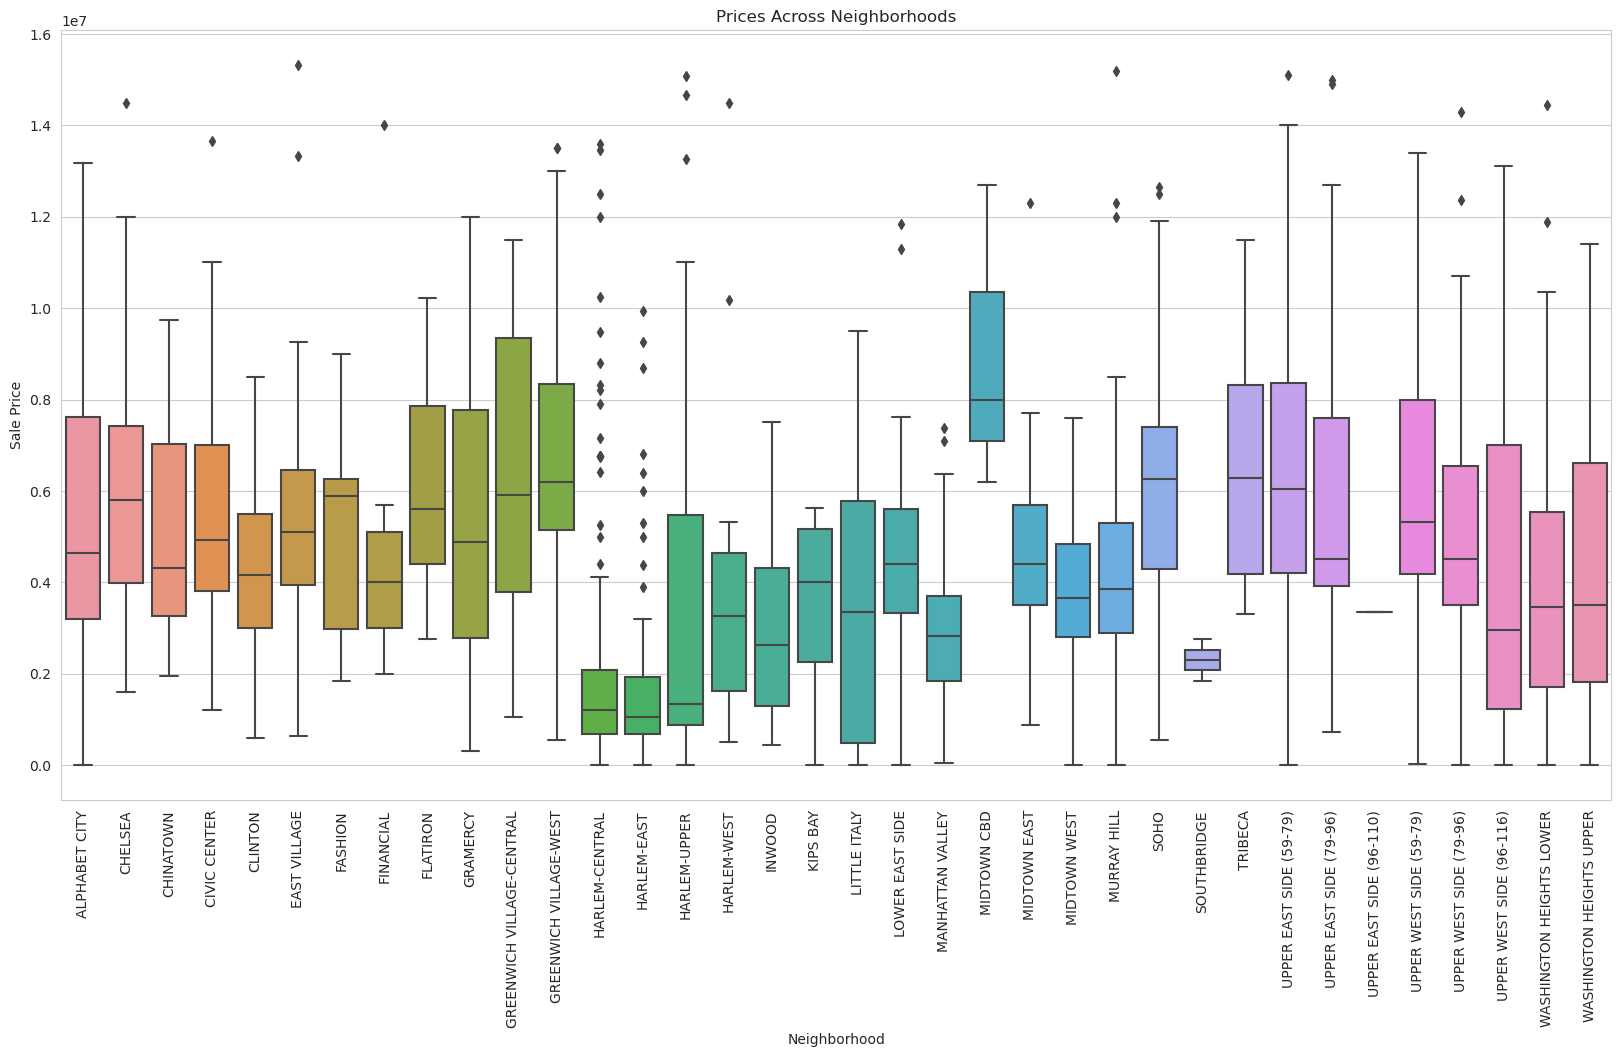

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(20, 10))
sns.boxplot(x='NEIGHBORHOOD', y='SALE PRICE', data=df)
plt.xticks(rotation=90)
plt.title('Prices Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.show()

##### Visualize the Prices Over Time

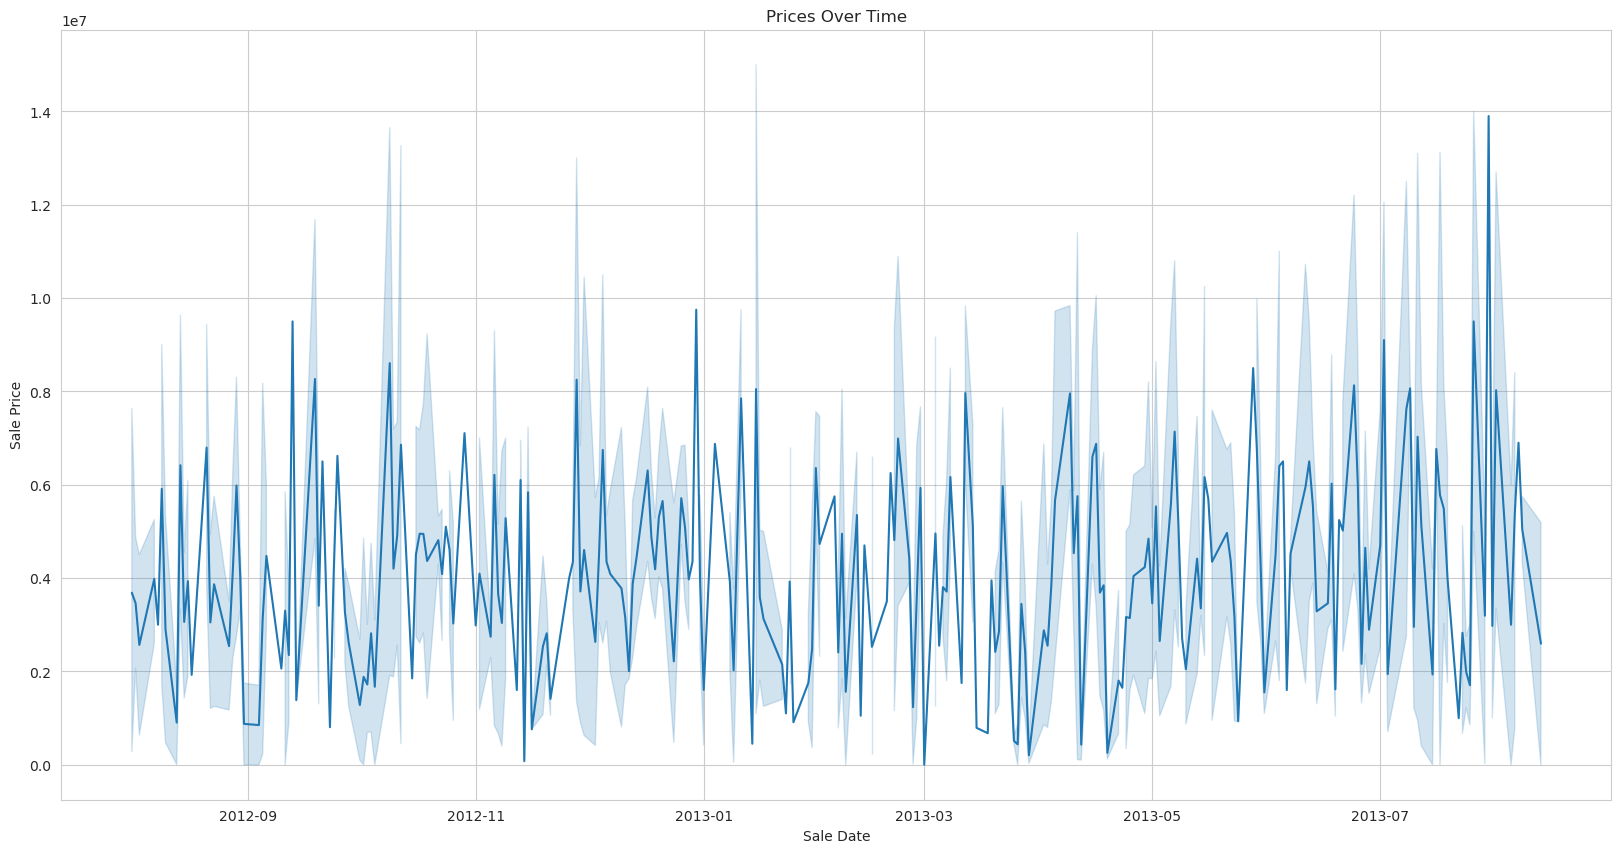

In [21]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='SALE DATE', y='SALE PRICE', data=df)
plt.title('Prices Over Time')
plt.xlabel('Sale Date')
plt.ylabel('Sale Price')
plt.show()

##### scatter matrix plot and the correlation matrix

/home/vulcan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


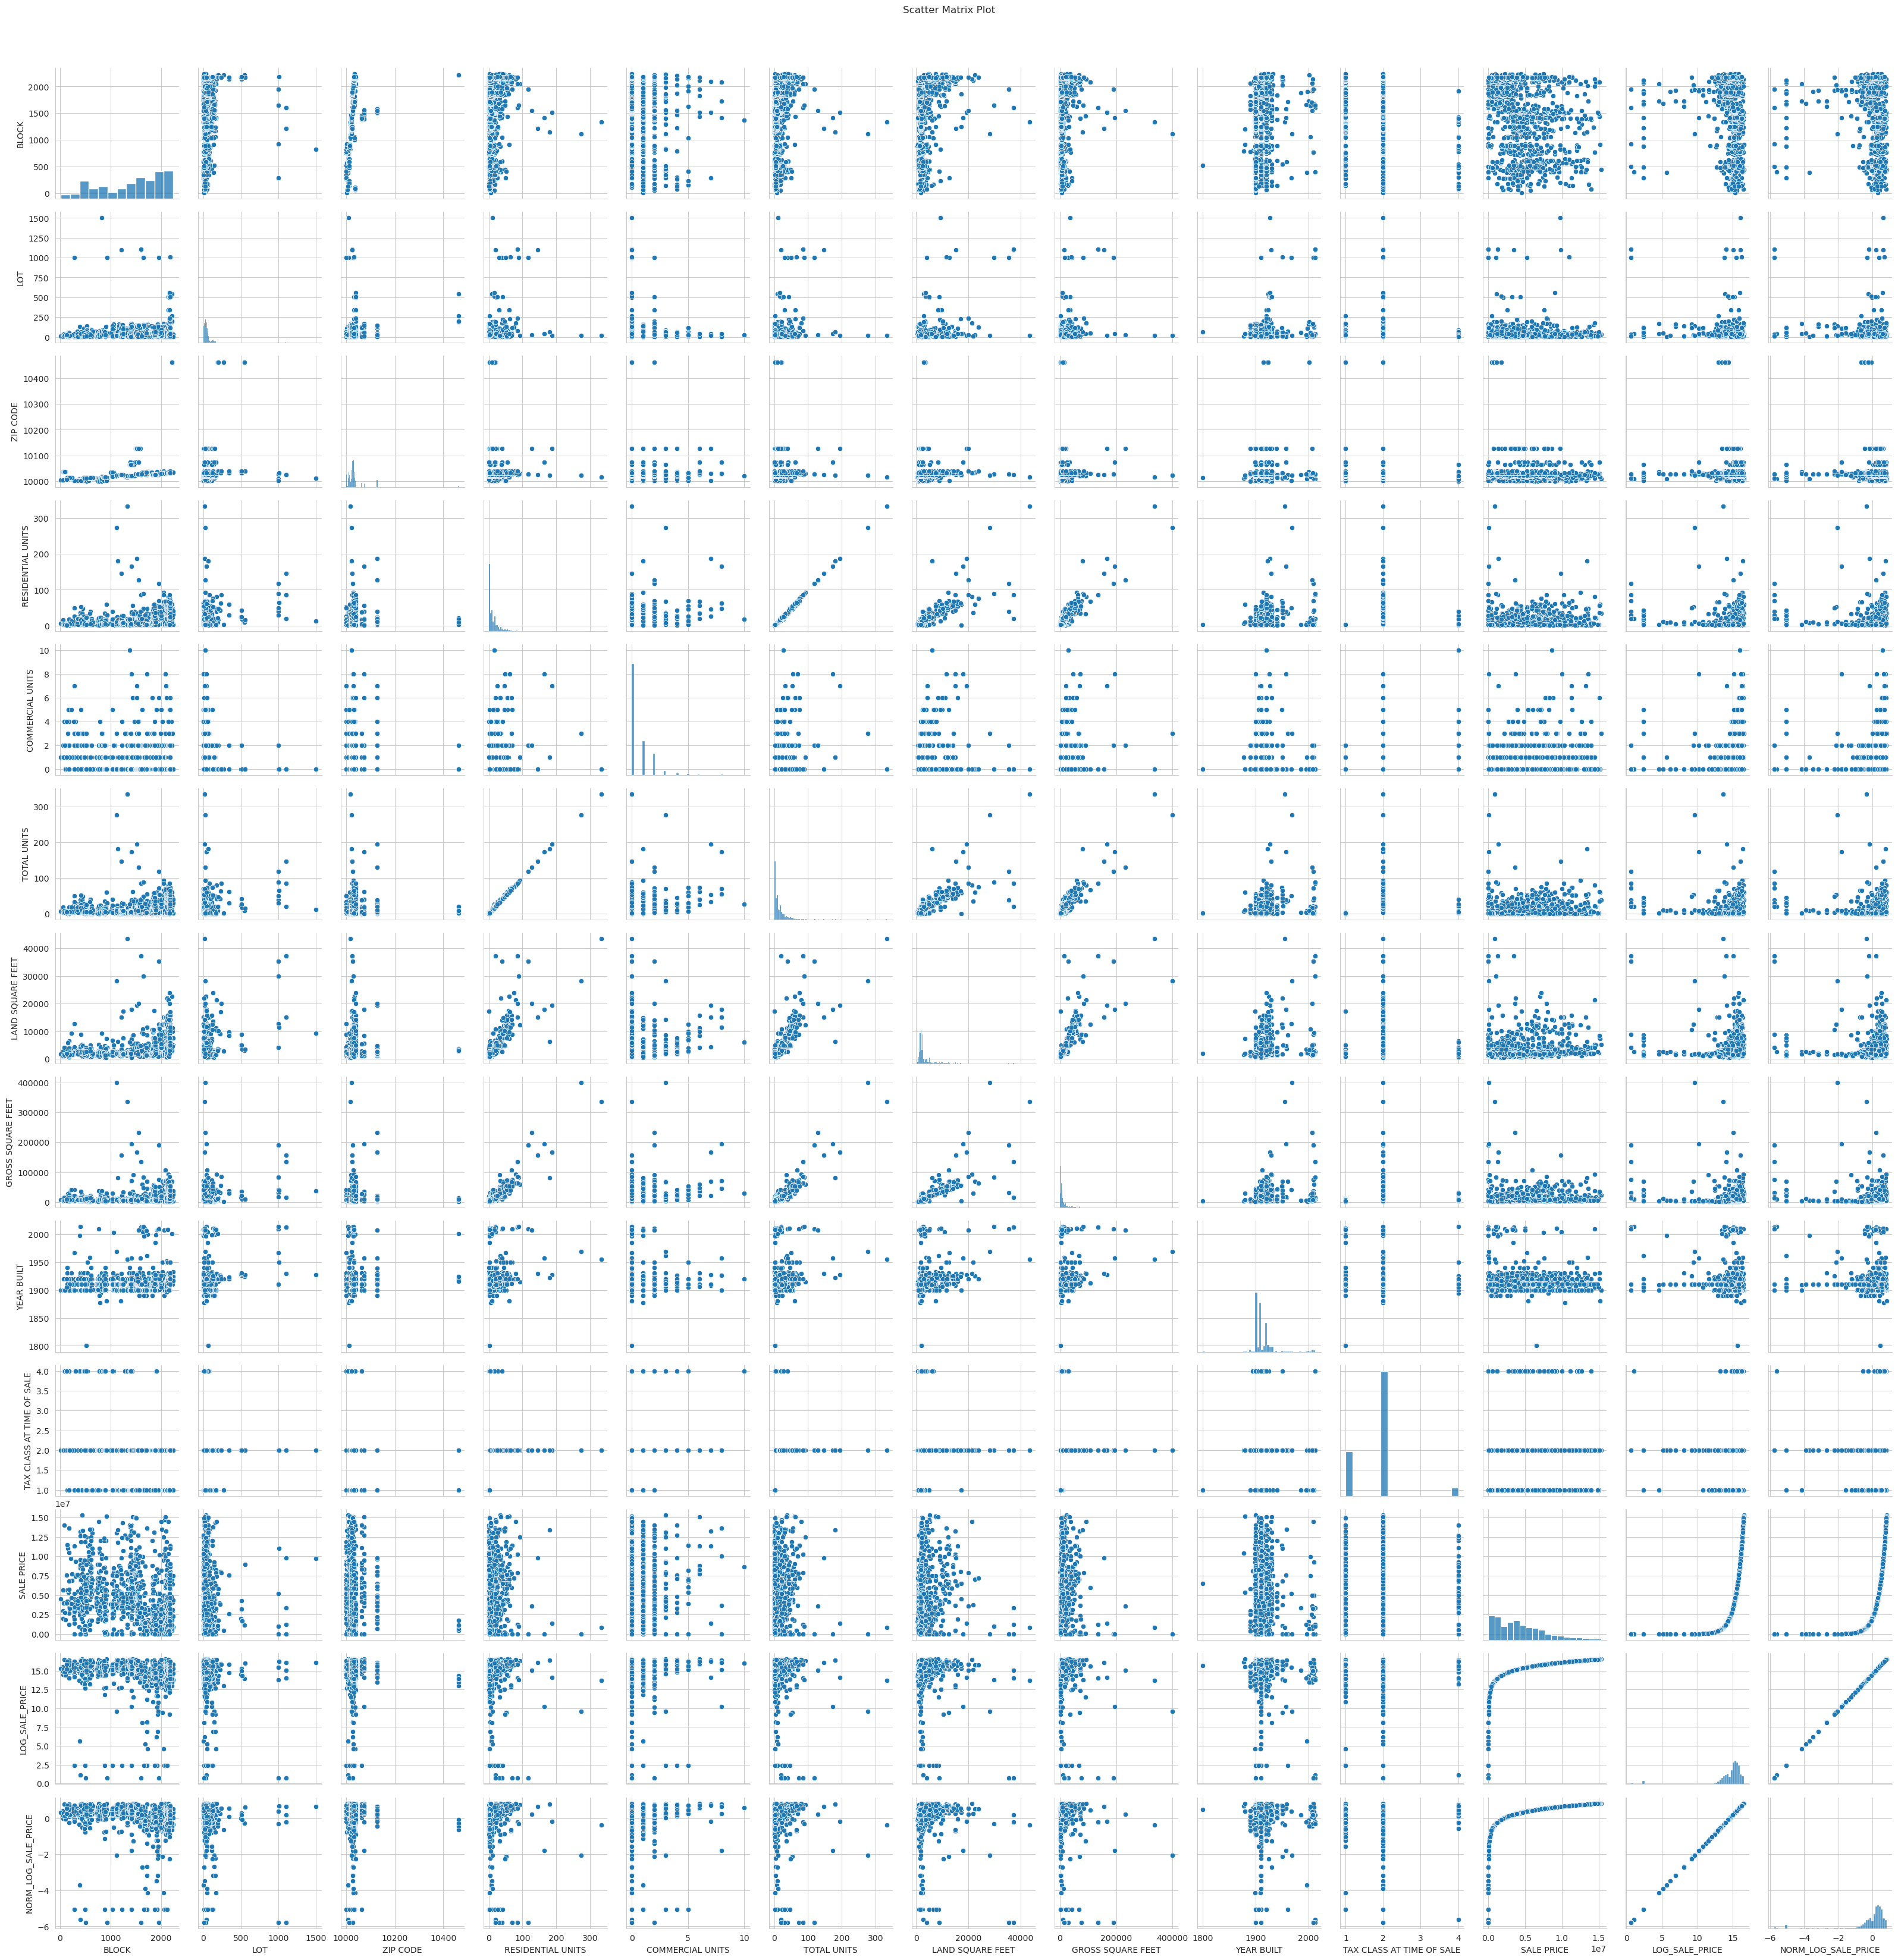

In [22]:
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

sns.pairplot(df[numerical_vars])
plt.suptitle('Scatter Matrix Plot', y=1.02)
plt.show()

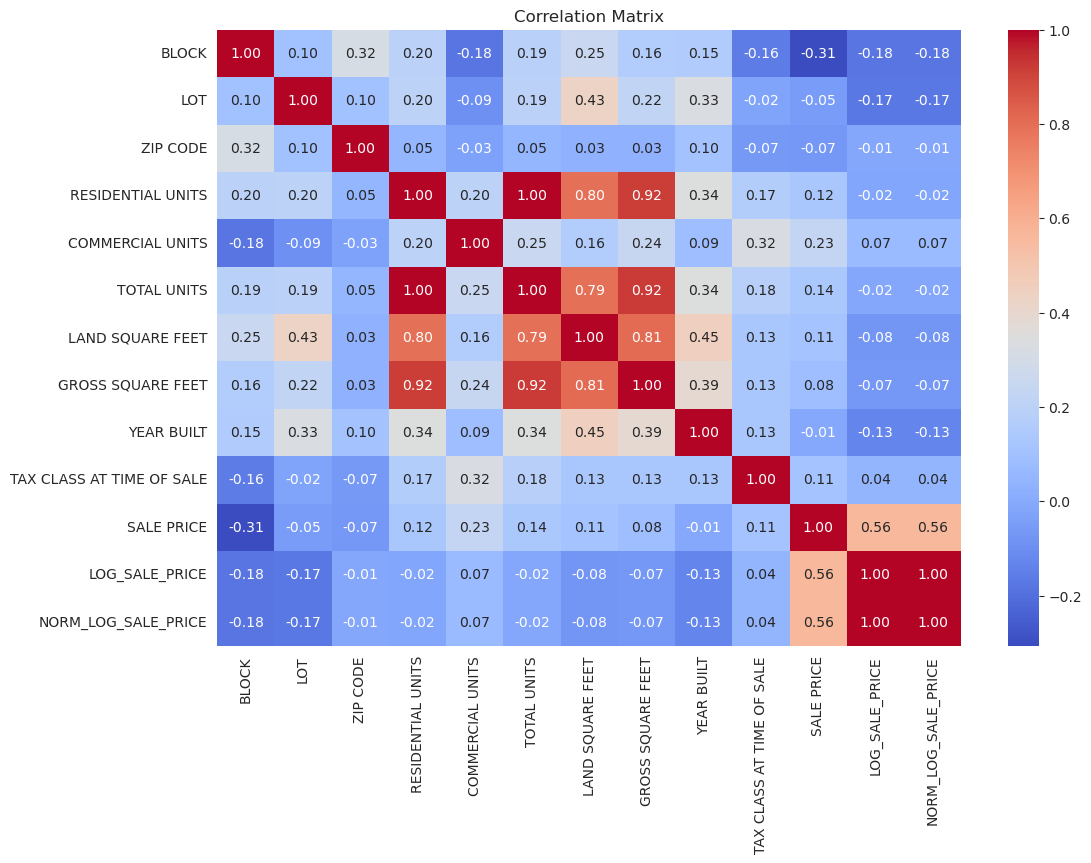

In [23]:
correlation_matrix = df[numerical_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##### more plots

/home/vulcan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


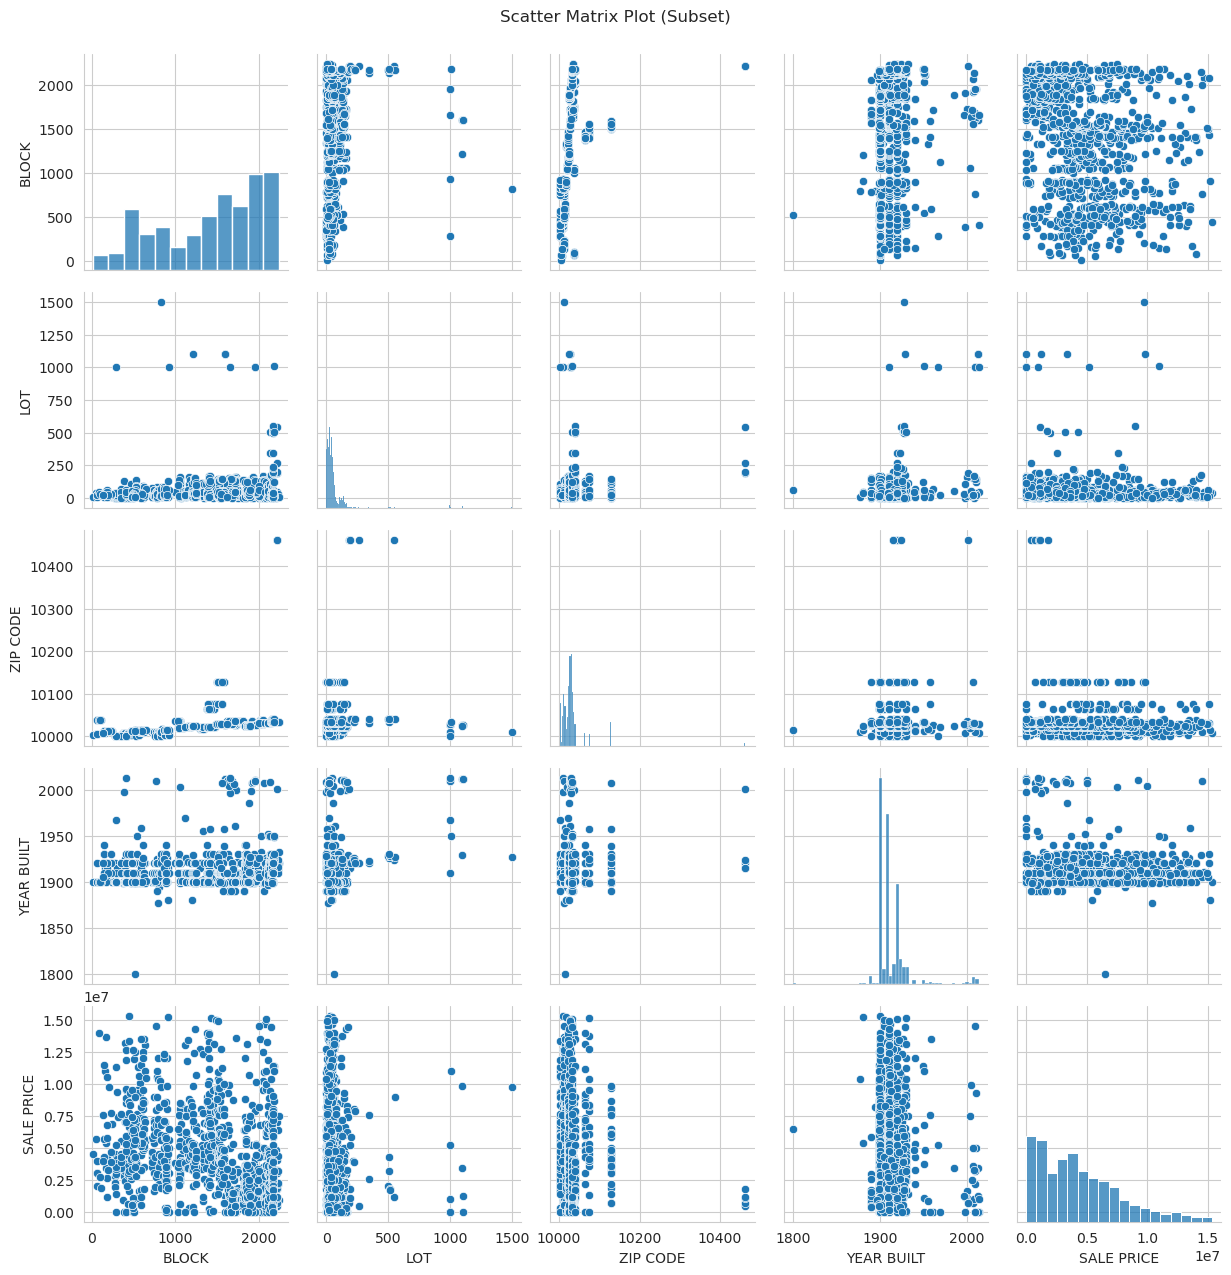

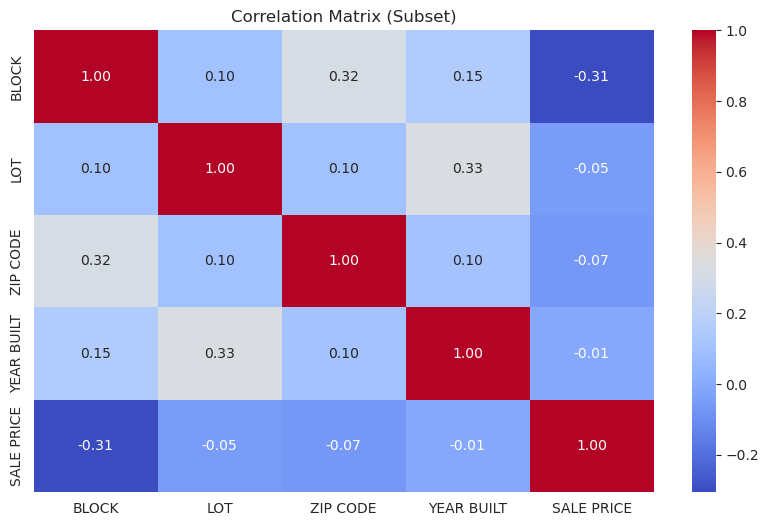

In [24]:
selected_numerical_vars = ['BLOCK', 'LOT', 'ZIP CODE', 'YEAR BUILT', 'SALE PRICE']

sns.pairplot(df[selected_numerical_vars])
plt.suptitle('Scatter Matrix Plot (Subset)', y=1.02)
plt.show()

correlation_matrix_subset = df[selected_numerical_vars].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Subset)')
plt.show()

In [25]:
# top most correlated variables

correlation_matrix_abs = correlation_matrix_subset.abs()
correlation_matrix_upper = correlation_matrix_abs.where(np.triu(np.ones(correlation_matrix_abs.shape), k=1).astype(bool))
correlation_pairs = correlation_matrix_upper.stack().sort_values(ascending=False)

top_correlated_pairs = correlation_pairs.head(5)
top_correlated_pairs

LOT       YEAR BUILT    0.327126
BLOCK     ZIP CODE      0.315721
          SALE PRICE    0.306078
          YEAR BUILT    0.153431
ZIP CODE  YEAR BUILT    0.103786
dtype: float64

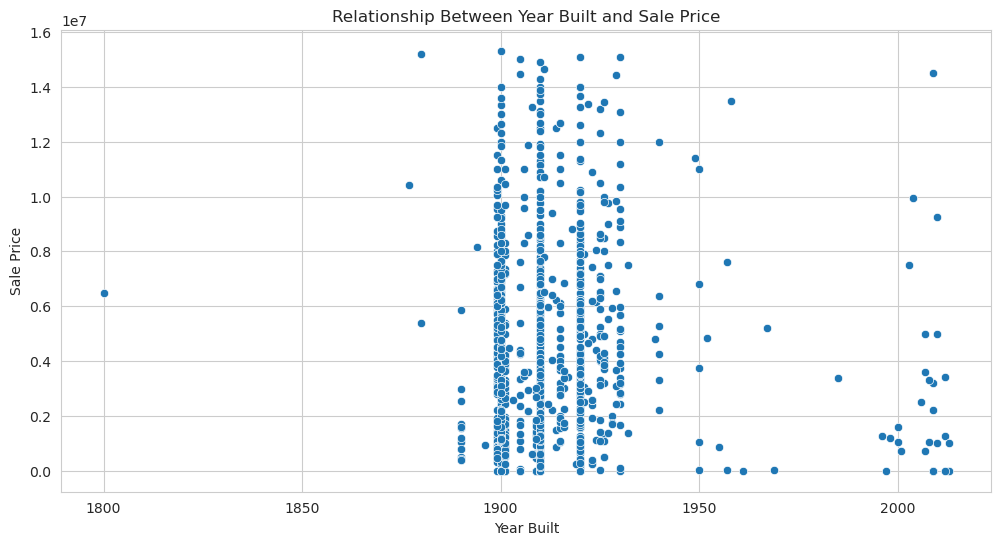

In [26]:
# Explore the relationship between 'SALE PRICE' and 'YEAR BUILT'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YEAR BUILT', y='SALE PRICE', data=df)
plt.title('Relationship Between Year Built and Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

 There is no clear trend, but it's worth noting that newer buildings (those built in more recent years) tend to have a wide range of sale prices.

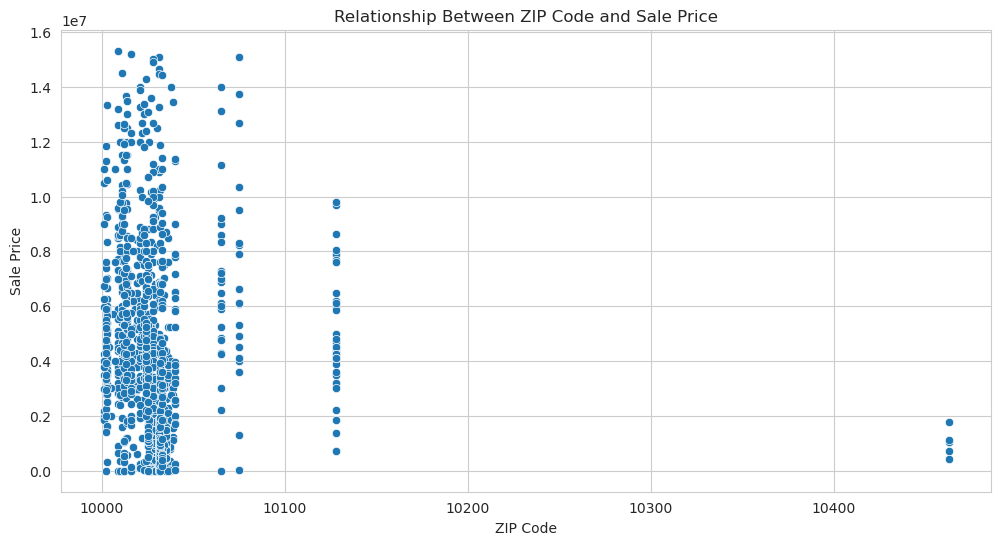

In [27]:
# Explore the relationship between 'SALE PRICE' and 'ZIP CODE'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ZIP CODE', y='SALE PRICE', data=df)
plt.title('Relationship Between ZIP Code and Sale Price')
plt.xlabel('ZIP Code')
plt.ylabel('Sale Price')
plt.show()

There are some ZIP codes where the properties seem to have higher sale prices, indicating that location could be a significant factor.

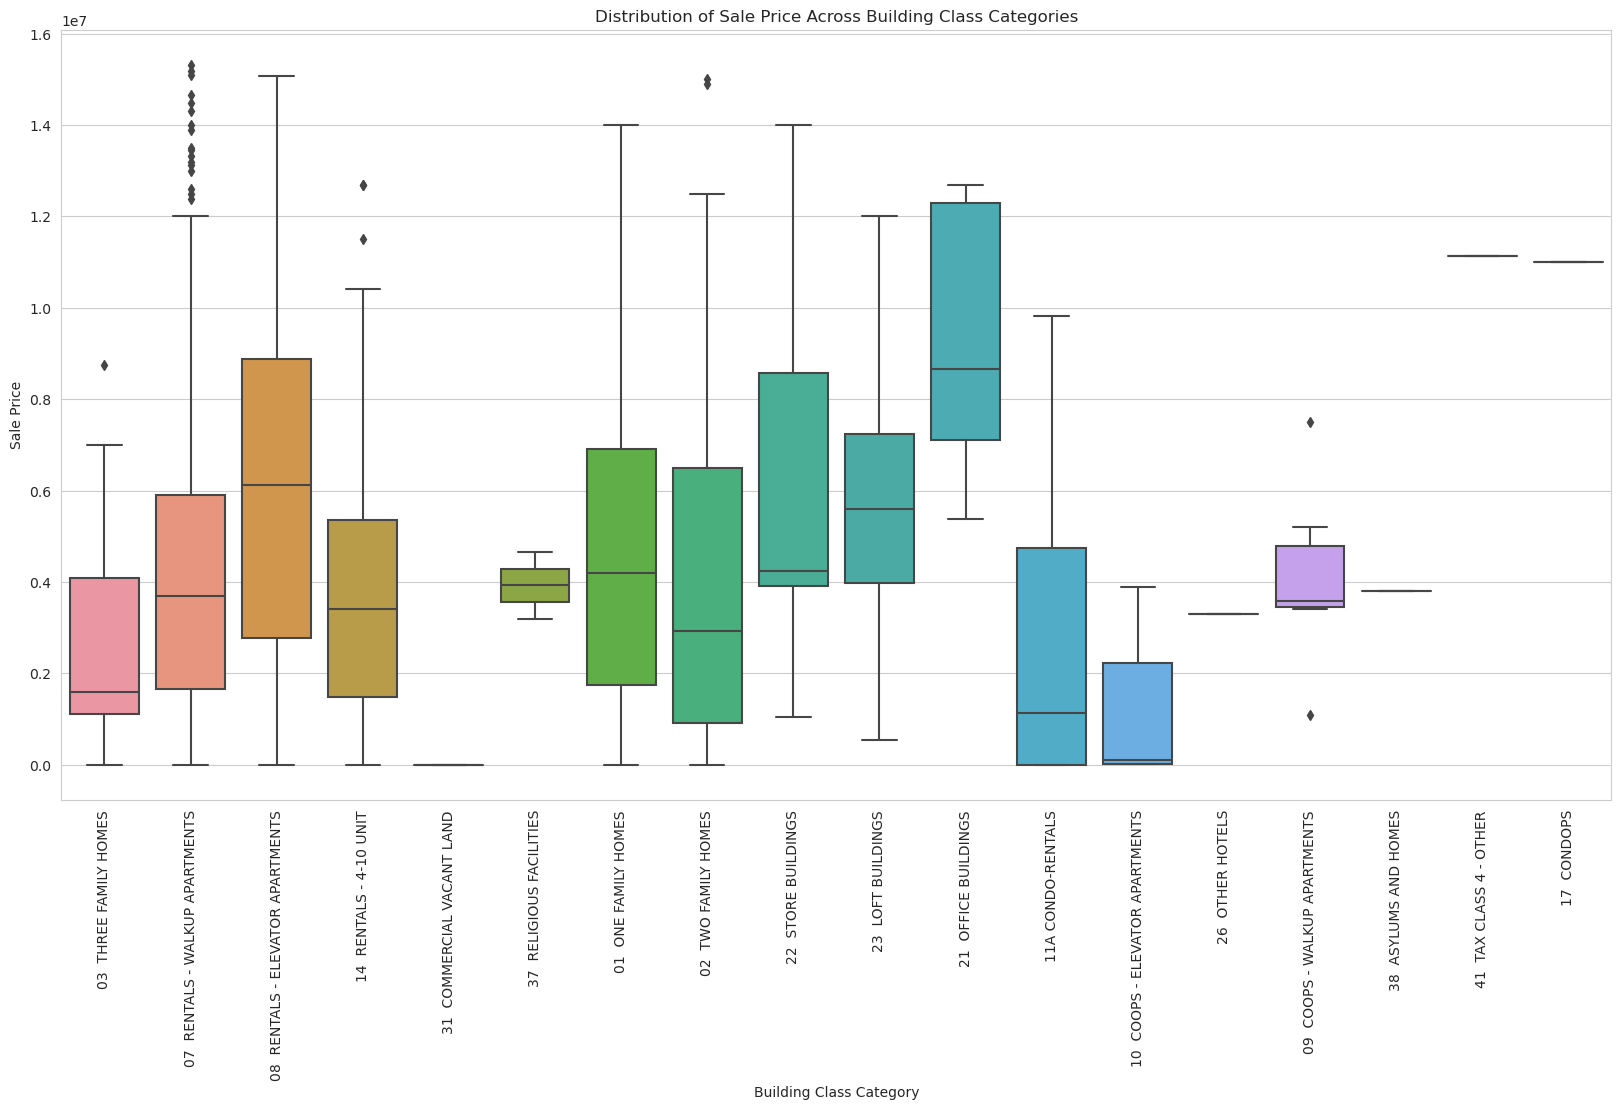

In [28]:
# Explore the distribution of 'SALE PRICE' across different 'BUILDING CLASS CATEGORY'
plt.figure(figsize=(20, 10))
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Sale Price Across Building Class Categories')
plt.xlabel('Building Class Category')
plt.ylabel('Sale Price')
plt.show()

Some categories have a narrower range of sale prices, while others have a broader range. This could indicate the type of buildings that are more valuable or in demand.

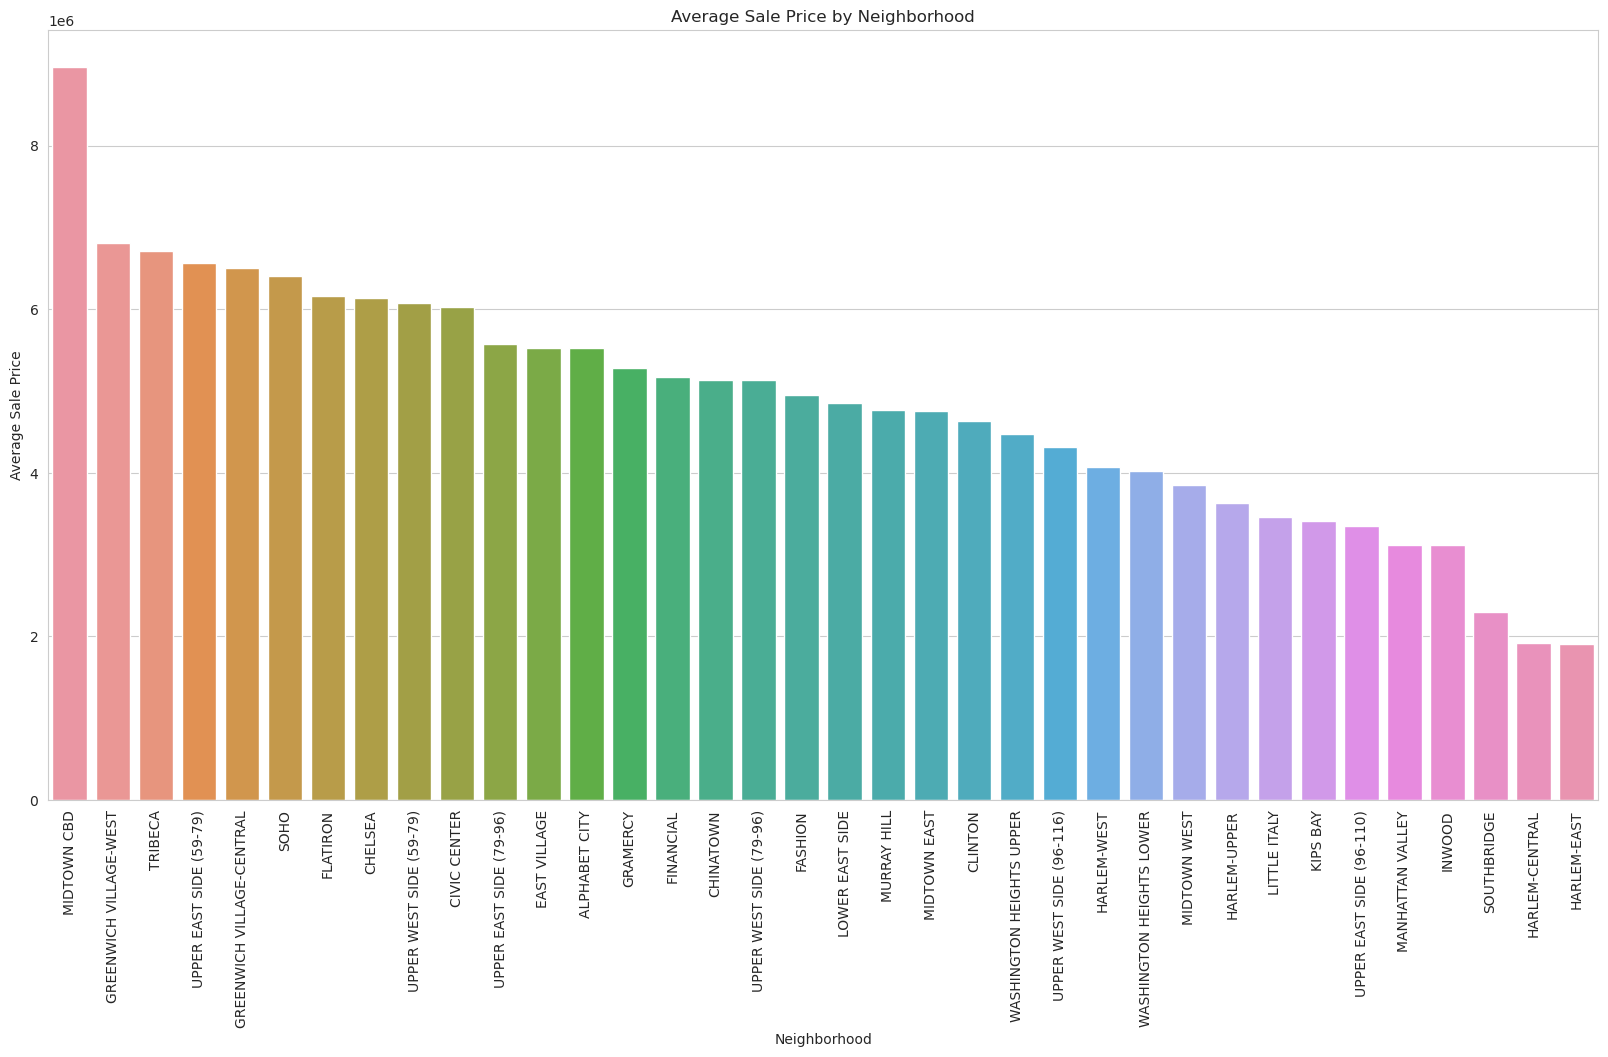

In [29]:
# Calculate the average sale price and the number of sales for each neighborhood
neighborhood_stats = df.groupby('NEIGHBORHOOD').agg({'SALE PRICE': ['mean', 'count']}).reset_index()
neighborhood_stats.columns = ['NEIGHBORHOOD', 'AVG_SALE_PRICE', 'NUM_SALES']

neighborhood_stats_sorted = neighborhood_stats.sort_values(by='AVG_SALE_PRICE', ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x='NEIGHBORHOOD', y='AVG_SALE_PRICE', data=neighborhood_stats_sorted)
plt.xticks(rotation=90)
plt.title('Average Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.show()

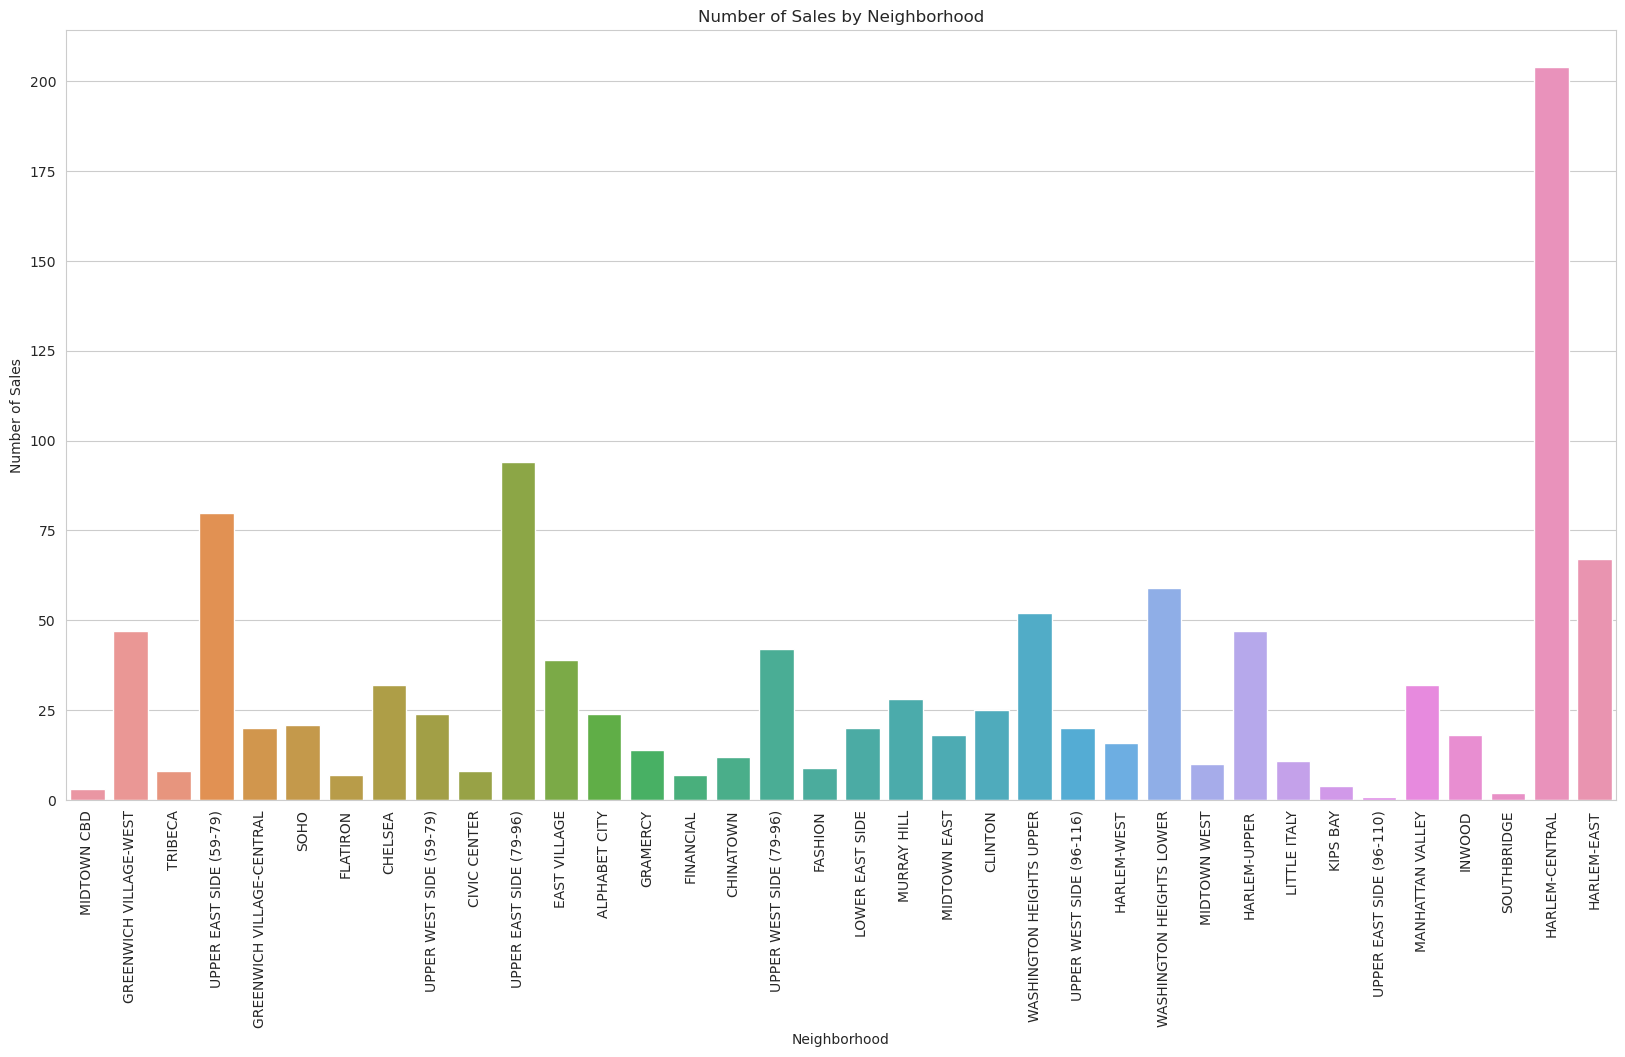

In [30]:
# Plot the number of sales for each neighborhood
plt.figure(figsize=(20, 10))
sns.barplot(x='NEIGHBORHOOD', y='NUM_SALES', data=neighborhood_stats_sorted)
plt.xticks(rotation=90)
plt.title('Number of Sales by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Sales')
plt.show()

The number of sales varies significantly among neighborhoods. For instance, 'MIDTOWN CBD' has the highest average sale price but only 3 sales, indicating it might be an exclusive area with fewer transactions.

In [31]:
neighborhood_stats_sorted.head()

NEIGHBORHOOD  AVG_SALE_PRICE  NUM_SALES
21                MIDTOWN CBD    8.964000e+06          3
11     GREENWICH VILLAGE-WEST    6.804284e+06         47
27                    TRIBECA    6.710625e+06          8
28    UPPER EAST SIDE (59-79)    6.567847e+06         80
10  GREENWICH VILLAGE-CENTRAL    6.501251e+06         20

### Model Building

 ##### Hot Encoding Categorical Vars

In [34]:
df.to_csv('df_pre_model.csv',index=False)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [40]:
df

NEIGHBORHOOD            BUILDING CLASS CATEGORY  \
18                ALPHABET CITY             03  THREE FAMILY HOMES   
21                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
22                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
24                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
25                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
...                         ...                                ...   
27064  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27065  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27066  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27067  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27371  WASHINGTON HEIGHTS UPPER                        17  CONDOPS   

      TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
18                       1    377    66                        C0   
21                       2    375    62                        C4   
22                       2    376    30                        C4   
24                      2B    385     1                        C7   
25                       2    391    55                        C4   
...                    ...    ...   ...                       ...   
27064                    2   2175    33                        D7   
27065                    2   2177     8                        D1   
27066                    2   2177    39                        D1   
27067                    2   2180   505                        D7   
27371                    2   2180  1007                        R9   

                       ADDRESS  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
18       243 EAST 7TH   STREET     10009                3.0                 0   
21       715 EAST 5TH   STREET     10009               20.0                 0   
22     274 EAST SEVENTH STREET     10009               13.0                 0   
24                 17 AVENUE B     10009                7.0                 1   
25       309 EAST 8TH   STREET     10009               17.0                 0   
...                        ...       ...                ...               ...   
27064            4720 BROADWAY     10040               50.0                 2   
27065       2 PINEHURST AVENUE     10033               54.0                 0   
27066      12 PINEHURST AVENUE     10033               61.0                 0   
27067            4441 BROADWAY     10040               25.0                 2   
27371         1 BENNETT AVENUE     10033               65.0                 0   

       TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
18             3.0            2381.0             3084.0        1899   
21            20.0            2426.0             9345.0        1900   
22            13.0            2726.0            13002.0        1910   
24             8.0            2093.0             5852.0        1997   
25            17.0            2164.0             9071.0        1900   
...            ...               ...                ...         ...   
27064         52.0           12050.0            52378.0        1920   
27065         54.0           11800.0            55548.0        1910   
27066         61.0           11700.0            53874.0        1920   
27067         27.0            5000.0            20988.0        1930   
27371         65.0           11492.0            39762.0        1950   

       TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  SALE PRICE  \
18                             1                             C0   3150000.0   
21                             2                             C4   3650000.0   
22                             2                             C4    895250.0   
24                             2                             C7       283.0   
25                             2                             C4   3500000.0   
...                          ...                 

In [42]:
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
categorical_vars

['NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'BUILDING CLASS AT TIME OF SALE']

In [44]:
categorical_features = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [45]:
df_encoded

TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
18                       1    377    66                        C0   
21                       2    375    62                        C4   
22                       2    376    30                        C4   
24                      2B    385     1                        C7   
25                       2    391    55                        C4   
...                    ...    ...   ...                       ...   
27064                    2   2175    33                        D7   
27065                    2   2177     8                        D1   
27066                    2   2177    39                        D1   
27067                    2   2180   505                        D7   
27371                    2   2180  1007                        R9   

                       ADDRESS  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
18       243 EAST 7TH   STREET     10009                3.0                 0   
21       715 EAST 5TH   STREET     10009               20.0                 0   
22     274 EAST SEVENTH STREET     10009               13.0                 0   
24                 17 AVENUE B     10009                7.0                 1   
25       309 EAST 8TH   STREET     10009               17.0                 0   
...                        ...       ...                ...               ...   
27064            4720 BROADWAY     10040               50.0                 2   
27065       2 PINEHURST AVENUE     10033               54.0                 0   
27066      12 PINEHURST AVENUE     10033               61.0                 0   
27067            4441 BROADWAY     10040               25.0                 2   
27371         1 BENNETT AVENUE     10033               65.0                 0   

       TOTAL UNITS  LAND SQUARE FEET  ...  \
18             3.0            2381.0  ...   
21            20.0            2426.0  ...   
22            13.0            2726.0  ...   
24             8.0            2093.0  ...   
25            17.0            2164.0  ...   
...            ...               ...  ...   
27064         52.0           12050.0  ...   
27065         54.0           11800.0  ...   
27066         61.0           11700.0  ...   
27067         27.0            5000.0  ...   
27371         65.0           11492.0  ...   

       BUILDING CLASS CATEGORY_14  RENTALS - 4-10 UNIT  \
18                                               False   
21                                               False   
22                                               False   
24                                               False   
25                                               False   
...                                                ...   
27064                                            False   
27065                                            False   
27066                                            False   
27067                                            False   
27371                                            False   

       BUILDING CLASS CATEGORY_17  CONDOPS  \
18                                   False   
21                                   False   
22                                   False   
24                                   False   
25                                   False   
...                                    ...   
27064                                False   
27065                                False   
27066                                False   
27067                                False   
27371                                 True   

       BUILDING CLASS CATEGORY_21  OFFICE BUILDINGS  \
18                                            False   
21                                            False   
22                                            False   
24                                            False   
25                                            False   
...                                             ...   
27064                       

In [46]:
predictor_cols = ['YEAR BUILT', 'ZIP CODE', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
predictor_cols += [col for col in df_encoded.columns if 'NEIGHBORHOOD_' in col or 'BUILDING CLASS CATEGORY_' in col]

In [47]:
X = df_encoded[predictor_cols]
y = df_encoded['SALE PRICE']

In [48]:
X

YEAR BUILT  ZIP CODE  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
18           1899     10009          3.0            2381.0             3084.0   
21           1900     10009         20.0            2426.0             9345.0   
22           1910     10009         13.0            2726.0            13002.0   
24           1997     10009          8.0            2093.0             5852.0   
25           1900     10009         17.0            2164.0             9071.0   
...           ...       ...          ...               ...                ...   
27064        1920     10040         52.0           12050.0            52378.0   
27065        1910     10033         54.0           11800.0            55548.0   
27066        1920     10033         61.0           11700.0            53874.0   
27067        1930     10040         27.0            5000.0            20988.0   
27371        1950     10033         65.0           11492.0            39762.0   

       NEIGHBORHOOD_CHELSEA  NEIGHBORHOOD_CHINATOWN  \
18                    False                   False   
21                    False                   False   
22                    False                   False   
24                    False                   False   
25                    False                   False   
...                     ...                     ...   
27064                 False                   False   
27065                 False                   False   
27066                 False                   False   
27067                 False                   False   
27371                 False                   False   

       NEIGHBORHOOD_CIVIC CENTER  NEIGHBORHOOD_CLINTON  \
18                         False                 False   
21                         False                 False   
22                         False                 False   
24                         False                 False   
25                         False                 False   
...                          ...                   ...   
27064                      False                 False   
27065                      False                 False   
27066                      False                 False   
27067                      False                 False   
27371                      False                 False   

       NEIGHBORHOOD_EAST VILLAGE  ...  \
18                         False  ...   
21                         False  ...   
22                         False  ...   
24                         False  ...   
25                         False  ...   
...                          ...  ...   
27064                      False  ...   
27065                      False  ...   
27066                      False  ...   
27067                      False  ...   
27371                      False  ...   

       BUILDING CLASS CATEGORY_14  RENTALS - 4-10 UNIT  \
18                                               False   
21                                               False   
22                                               False   
24                                               False   
25                                               False   
...                                                ...   
27064                                            False   
27065                                            False   
27066                                            False   
27067                                            False   
27371                                            False   

       BUILDING CLASS CATEGORY_17  CONDOPS  \
18                                   False   
21                                   False   
22                                   False   
24                                   False   
25                                   False   
...                                    ...   
27064                                False   
27065                                False   
27066                                False   
27067                     

In [49]:
X.isna().sum().sum(), y.isna().sum()

(0, 0)

##### Data Splitting

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((900, 57), (225, 57), (900,), (225,))

##### Trying out linear regression first

In [52]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

8555072344674.379

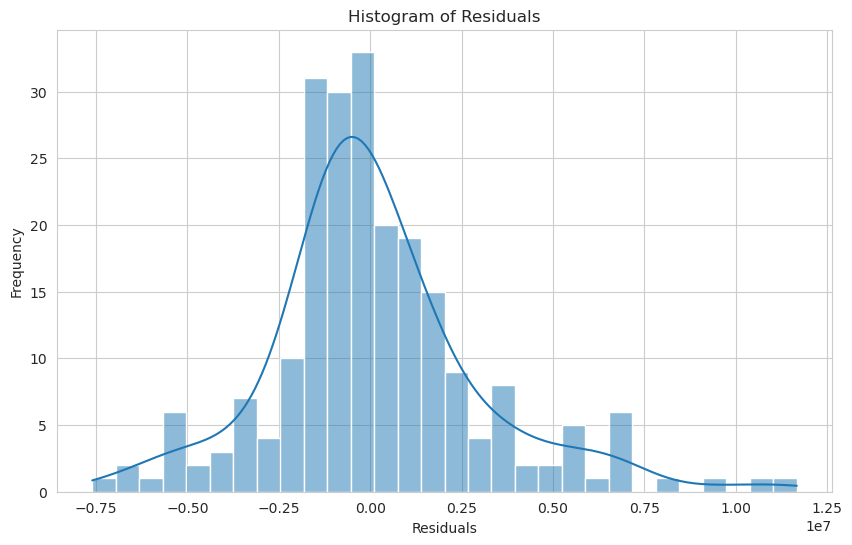

In [53]:
# Plot a histogram of the residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

This suggests that the linear model may not capture all the complexities of the data, and there might be room for improvement.

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf

6217340676911.436

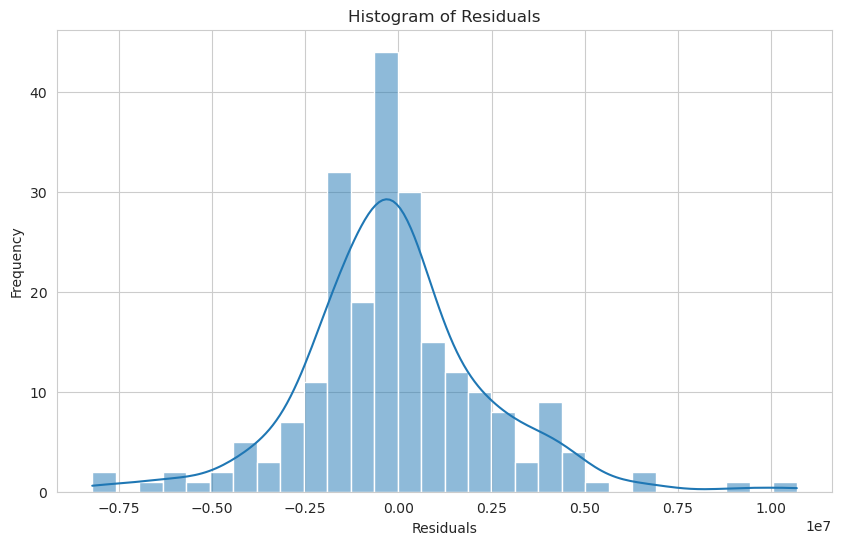

In [55]:
# Plot a histogram of the residuals
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_gb

6446379035701.882

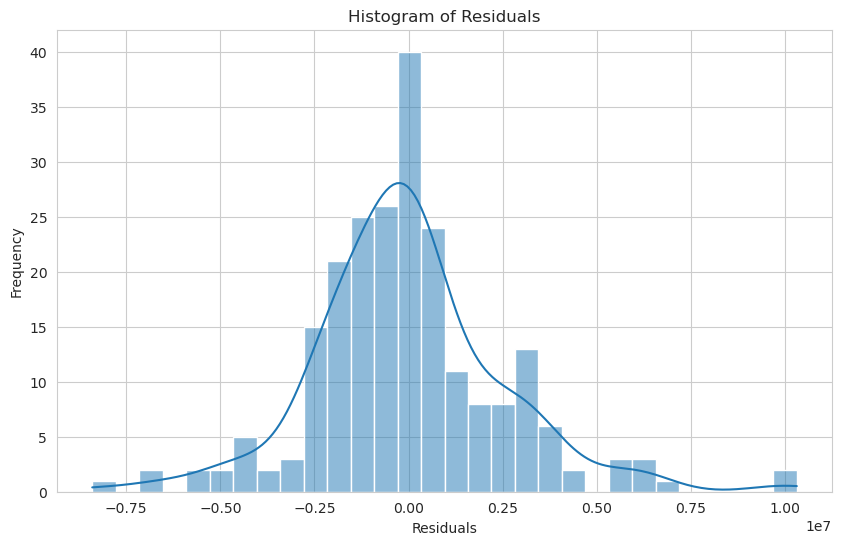

In [58]:
# Plot a histogram of the residuals
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(10, 6))
sns.histplot(residuals_gb, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [60]:
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=42)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_xgb

7697515857580.211

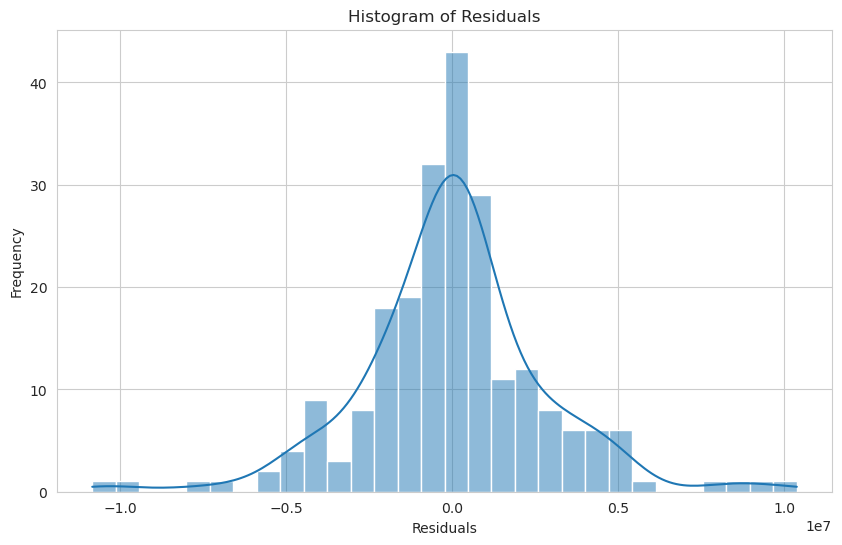

In [61]:
# Plot a histogram of the residuals
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### From what I have observed so far that the poor performance must be the result of improper data preproceessing so lets dive into preprocessing again and see if that helps.

### Part 2

#### Feature Engineering

let's start by trying out a bunch of features that seem logically relvant to see what sticks

In [62]:
from datetime import datetime

In [ ]:
df['AGE_OF_BUILDING'] = 2012 - df['YEAR BUILT']

In [73]:
features_to_drop = ['PRICE_PER_RES_UNIT', 'PRICE_PER_COM_UNIT', 'PRICE_PER_TOTAL_UNIT']

df  = df.drop(features_to_drop, axis=1)

In [74]:
df

NEIGHBORHOOD            BUILDING CLASS CATEGORY  \
18                ALPHABET CITY             03  THREE FAMILY HOMES   
21                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
22                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
24                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
25                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
...                         ...                                ...   
27064  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27065  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27066  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27067  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27371  WASHINGTON HEIGHTS UPPER                        17  CONDOPS   

      TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
18                       1    377    66                        C0   
21                       2    375    62                        C4   
22                       2    376    30                        C4   
24                      2B    385     1                        C7   
25                       2    391    55                        C4   
...                    ...    ...   ...                       ...   
27064                    2   2175    33                        D7   
27065                    2   2177     8                        D1   
27066                    2   2177    39                        D1   
27067                    2   2180   505                        D7   
27371                    2   2180  1007                        R9   

                       ADDRESS  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
18       243 EAST 7TH   STREET     10009                3.0                 0   
21       715 EAST 5TH   STREET     10009               20.0                 0   
22     274 EAST SEVENTH STREET     10009               13.0                 0   
24                 17 AVENUE B     10009                7.0                 1   
25       309 EAST 8TH   STREET     10009               17.0                 0   
...                        ...       ...                ...               ...   
27064            4720 BROADWAY     10040               50.0                 2   
27065       2 PINEHURST AVENUE     10033               54.0                 0   
27066      12 PINEHURST AVENUE     10033               61.0                 0   
27067            4441 BROADWAY     10040               25.0                 2   
27371         1 BENNETT AVENUE     10033               65.0                 0   

       ...  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
18     ...            2381.0             3084.0        1899   
21     ...            2426.0             9345.0        1900   
22     ...            2726.0            13002.0        1910   
24     ...            2093.0             5852.0        1997   
25     ...            2164.0             9071.0        1900   
...    ...               ...                ...         ...   
27064  ...           12050.0            52378.0        1920   
27065  ...           11800.0            55548.0        1910   
27066  ...           11700.0            53874.0        1920   
27067  ...            5000.0            20988.0        1930   
27371  ...           11492.0            39762.0        1950   

       TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  SALE PRICE  \
18                             1                              C0   3150000.0   
21                             2                              C4   3650000.0   
22                             2                              C4    895250.0   
24                             2                              C7       283.0   
25                             2                              C4   3500000.0   
...                          ...                             ...         ...   
27064                          2                           

In [75]:
df['TOTAL_UNITS_VS_RES_UNITS'] = df['TOTAL UNITS'] - df['RESIDENTIAL UNITS']
df['TOTAL_UNITS_VS_COM_UNITS'] = df['TOTAL UNITS'] - df['COMMERCIAL UNITS']
df['DIFF_LAND_GROSS_SQFT'] = df['GROSS SQUARE FEET'] - df['LAND SQUARE FEET']

In [76]:
df['SALE_DATE'] = pd.to_datetime(df['SALE DATE'])
df['MONTH_OF_SALE'] = df['SALE_DATE'].dt.month
df['YEAR_OF_SALE'] = df['SALE_DATE'].dt.year
df['DAY_OF_WEEK_OF_SALE'] = df['SALE_DATE'].dt.day_name()

In [77]:
df['STREET_NAME'] = df['ADDRESS'].str.extract('([a-zA-Z\s]+)')
df['STREET_NAME'] = df['STREET_NAME'].str.strip()

df['STREET_NAME']

18                      EAST
21                      EAST
22       EAST SEVENTH STREET
24                  AVENUE B
25                      EAST
                ...         
27064               BROADWAY
27065       PINEHURST AVENUE
27066       PINEHURST AVENUE
27067               BROADWAY
27371         BENNETT AVENUE
Name: STREET_NAME, Length: 1125, dtype: object

In [78]:
df

NEIGHBORHOOD            BUILDING CLASS CATEGORY  \
18                ALPHABET CITY             03  THREE FAMILY HOMES   
21                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
22                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
24                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
25                ALPHABET CITY    07  RENTALS - WALKUP APARTMENTS   
...                         ...                                ...   
27064  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27065  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27066  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27067  WASHINGTON HEIGHTS UPPER  08  RENTALS - ELEVATOR APARTMENTS   
27371  WASHINGTON HEIGHTS UPPER                        17  CONDOPS   

      TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
18                       1    377    66                        C0   
21                       2    375    62                        C4   
22                       2    376    30                        C4   
24                      2B    385     1                        C7   
25                       2    391    55                        C4   
...                    ...    ...   ...                       ...   
27064                    2   2175    33                        D7   
27065                    2   2177     8                        D1   
27066                    2   2177    39                        D1   
27067                    2   2180   505                        D7   
27371                    2   2180  1007                        R9   

                       ADDRESS  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
18       243 EAST 7TH   STREET     10009                3.0                 0   
21       715 EAST 5TH   STREET     10009               20.0                 0   
22     274 EAST SEVENTH STREET     10009               13.0                 0   
24                 17 AVENUE B     10009                7.0                 1   
25       309 EAST 8TH   STREET     10009               17.0                 0   
...                        ...       ...                ...               ...   
27064            4720 BROADWAY     10040               50.0                 2   
27065       2 PINEHURST AVENUE     10033               54.0                 0   
27066      12 PINEHURST AVENUE     10033               61.0                 0   
27067            4441 BROADWAY     10040               25.0                 2   
27371         1 BENNETT AVENUE     10033               65.0                 0   

       ...  NORM_LOG_SALE_PRICE  AGE_OF_BUILDING  TOTAL_UNITS_VS_RES_UNITS  \
18     ...             0.172506              114                       0.0   
21     ...             0.233921              113                       0.0   
22     ...            -0.351937              103                       0.0   
24     ...            -3.710181               16                       1.0   
25     ...             0.216427              113                       0.0   
...    ...                  ...              ...                       ...   
27064  ...             0.707221               93                       2.0   
27065  ...             0.542394              103                       0.0   
27066  ...             0.612453               93                       0.0   
27067  ...             0.179071               83                       2.0   
27371  ...             0.693796               63                       0.0   

       TOTAL_UNITS_VS_COM_UNITS  DIFF_LAND_GROSS_SQFT  SALE_DATE  \
18                          3.0                 703.0 2013-03-06   
21                         20.0                6919.0 2012-09-06   
22                         13.0               10276.0 2012-10-25   
24                          7.0                3759.0 2013-04-18   
25                         17.0                6907.0 2012-10-16   
...                         ...

In [81]:
df.to_csv('pre_model_new_feat.csv',index=False)

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

In [80]:
df_clean = df.dropna()

In [82]:
X = df_clean.drop(columns=['SALE PRICE', 'LOG_SALE_PRICE', 'NORM_LOG_SALE_PRICE', 'SALE DATE', 'SALE_DATE'])
y = df_clean['SALE PRICE']

In [85]:
from sklearn.preprocessing import OrdinalEncoder

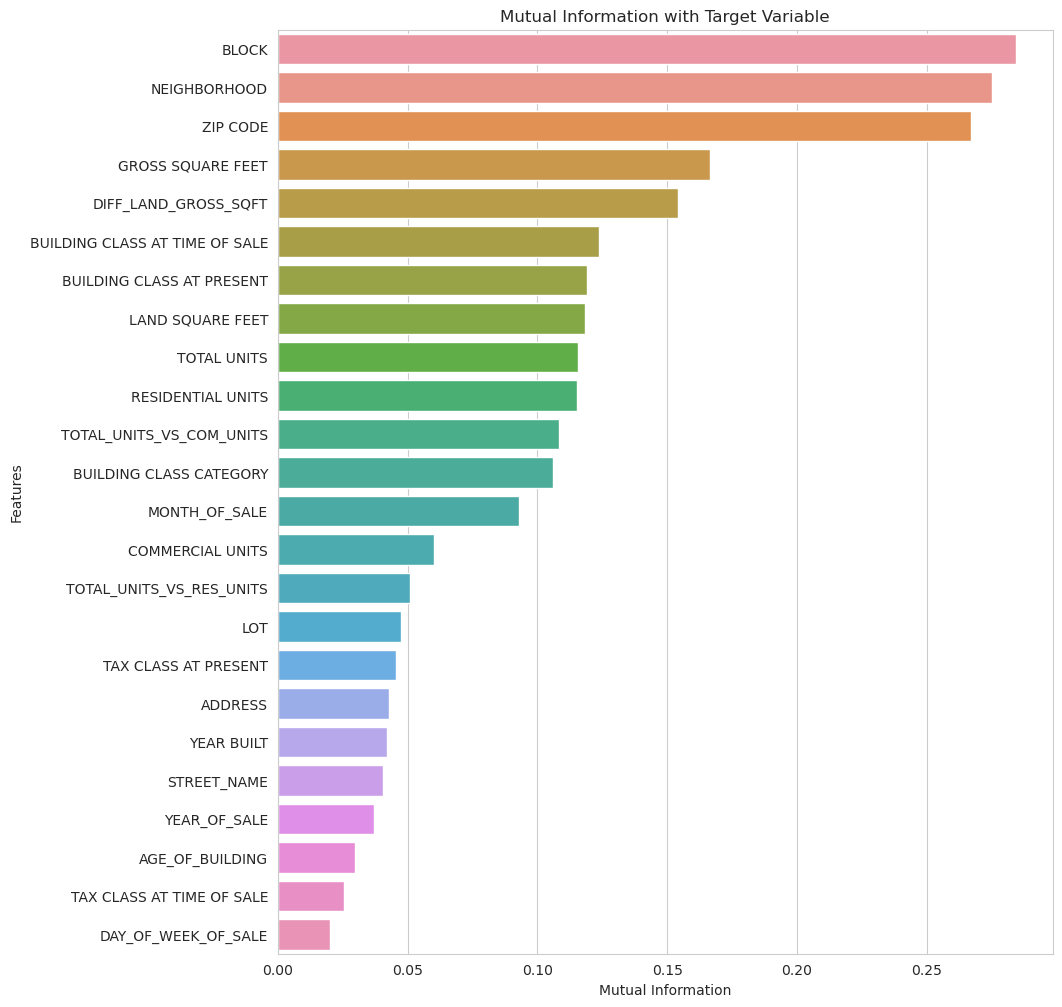

In [87]:
cat_cols = df_clean.select_dtypes(include=['object']).columns
oe = OrdinalEncoder()
df_clean[cat_cols] = oe.fit_transform(df_clean[cat_cols])
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info = mutual_info_regression(df_clean[X.columns], y, random_state=0)
mutual_info_df['Mutual Information'] = mutual_info
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Mutual Information', y='Feature', data=mutual_info_df)
plt.title('Mutual Information with Target Variable')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

In [89]:
df_clean.columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'LOG_SALE_PRICE', 'NORM_LOG_SALE_PRICE',
       'AGE_OF_BUILDING', 'TOTAL_UNITS_VS_RES_UNITS',
       'TOTAL_UNITS_VS_COM_UNITS', 'DIFF_LAND_GROSS_SQFT', 'SALE_DATE',
       'MONTH_OF_SALE', 'YEAR_OF_SALE', 'DAY_OF_WEEK_OF_SALE', 'STREET_NAME'],
      dtype='object')

In [92]:
stan_cols = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clean[stan_cols] = scaler.fit_transform(df_clean[stan_cols])

In [95]:
X = df_clean.drop(columns=['SALE PRICE', 'LOG_SALE_PRICE', 'NORM_LOG_SALE_PRICE', 'SALE DATE', 'SALE_DATE'])
y = df_clean['SALE PRICE']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [100]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

In [105]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2':r2 }

/home/vulcan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.815e+15, tolerance: 1.061e+12
  model = cd_fast.enet_coordinate_descent(


In [106]:
results_df = pd.DataFrame(results).T
results_df

MSE          RMSE           MAE        R2
Linear Regression       8.665258e+12  2.943681e+06  2.158220e+06  0.186074
Ridge                   8.662637e+12  2.943236e+06  2.157844e+06  0.186320
Lasso                   8.665240e+12  2.943678e+06  2.158220e+06  0.186076
Random Forest           6.732111e+12  2.594631e+06  1.740812e+06  0.367654
Gradient Boosting       6.682304e+12  2.585015e+06  1.758548e+06  0.372333
Support Vector Machine  1.075538e+13  3.279540e+06  2.613604e+06 -0.010251

In [107]:
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 50, 100, 200, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

In [171]:
# grid_search.fit(X_train, y_train)

In [135]:
best_params = grid_search.best_params_

best_params

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [136]:
best_rf = grid_search.best_estimator_

In [137]:
y_pred = best_rf.predict(X_test)

In [138]:
results = {}
best_rf.fit(X_train, y_train)
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

results['Random Forest'] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2':r2 }

In [139]:
results

{'Random Forest': {'MSE': 6331119395770.436,
  'RMSE': 2516171.5751852924,
  'MAE': 1739617.5062866725,
  'R2': 0.40531929377238396}}

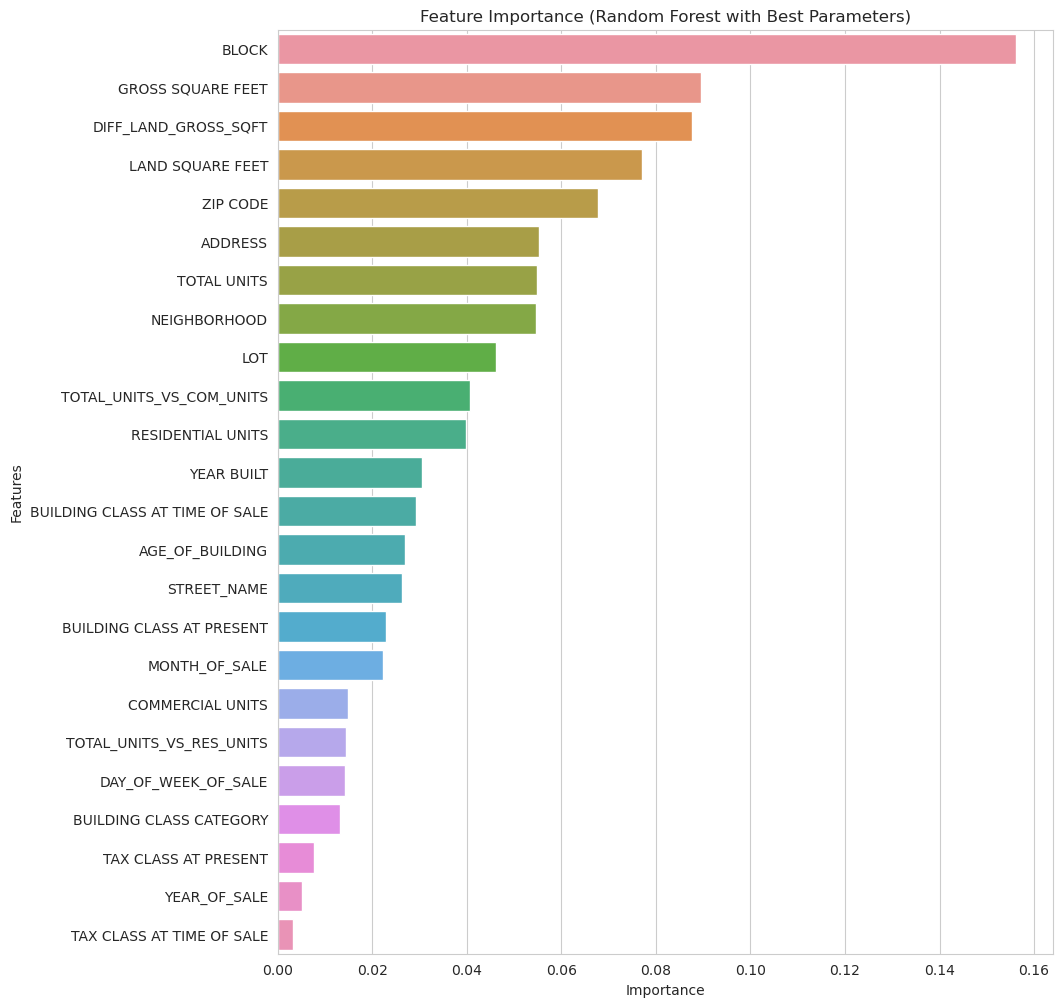

In [120]:
feature_importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest with Best Parameters)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Trying out stacking algos

In [121]:
from sklearn.ensemble import StackingRegressor

In [122]:
base_models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

In [123]:
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=Ridge())

stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('Linear Regression', LinearRegression()),
                              ('Ridge', Ridge()),
                              ('Random Forest',
                               RandomForestRegressor(random_state=42)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=Ridge())

In [124]:
y_pred = stacking_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 6490866409601.755
Root Mean Squared Error: 2547717.8826553295
Mean Absolute Error: 1716942.0290171131
R2 Score: 0.39031429053923916


In [128]:
# param_grid = {
#     'Ridge__alpha': [0.1, 1, 10],
#     'Random Forest__n_estimators': [10, 50],
#     'Random Forest__max_depth': [None, 10, 20],
#     'Gradient Boosting__n_estimators': [50, 100],
#     'Gradient Boosting__learning_rate': [0.01, 0.1],
#     'final_estimator__alpha': [0.1, 1.0, 10.0]
# }

# grid_search = GridSearchCV(estimator=stacking_regressor, param_grid=param_grid, 
#                            cv=3, verbose=2, n_jobs=-1)

# grid_search.fit(X_train, y_train)

In [127]:
best_params = grid_search.best_params_

best_params

{'Gradient Boosting__learning_rate': 0.1,
 'Gradient Boosting__n_estimators': 50,
 'Random Forest__max_depth': 20,
 'Random Forest__n_estimators': 50,
 'Ridge__alpha': 10,
 'final_estimator__alpha': 0.1}

In [129]:
best_stacking_regressor = grid_search.best_estimator_

In [130]:
y_pred = best_stacking_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 6375287067761.795
Root Mean Squared Error: 2524933.081838367
Mean Absolute Error: 1707420.6772052129
R2 Score: 0.4011706336808055


### part 2.2

In [141]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
X_clustering = df_clean.drop(columns=['SALE PRICE', 'LOG_SALE_PRICE', 'NORM_LOG_SALE_PRICE', 'SALE DATE', 'SALE_DATE'])

In [143]:
X_clustering

NEIGHBORHOOD  BUILDING CLASS CATEGORY  TAX CLASS AT PRESENT  BLOCK  \
18              0.0                      2.0                   0.0    377   
21              0.0                      3.0                   1.0    375   
22              0.0                      3.0                   1.0    376   
24              0.0                      3.0                   3.0    385   
25              0.0                      3.0                   1.0    391   
...             ...                      ...                   ...    ...   
27064          35.0                      4.0                   1.0   2175   
27065          35.0                      4.0                   1.0   2177   
27066          35.0                      4.0                   1.0   2177   
27067          35.0                      4.0                   1.0   2180   
27371          35.0                      9.0                   1.0   2180   

        LOT  BUILDING CLASS AT PRESENT  ADDRESS  ZIP CODE  RESIDENTIAL UNITS  \
18       66                        9.0    490.0     10009                3.0   
21       62                       13.0   1009.0     10009               20.0   
22       30                       13.0    547.0     10009               13.0   
24        1                       16.0    267.0     10009                7.0   
25       55                       13.0    595.0     10009               17.0   
...     ...                        ...      ...       ...                ...   
27064    33                       24.0    832.0     10040               50.0   
27065     8                       18.0    317.0     10033               54.0   
27066    39                       18.0     81.0     10033               61.0   
27067   505                       24.0    803.0     10040               25.0   
27371  1007                       36.0      0.0     10033               65.0   

       COMMERCIAL UNITS  ...  TAX CLASS AT TIME OF SALE  \
18                    0  ...                          1   
21                    0  ...                          2   
22                    0  ...                          2   
24                    1  ...                          2   
25                    0  ...                          2   
...                 ...  ...                        ...   
27064                 2  ...                          2   
27065                 0  ...                          2   
27066                 0  ...                          2   
27067                 2  ...                          2   
27371                 0  ...                          2   

       BUILDING CLASS AT TIME OF SALE  AGE_OF_BUILDING  \
18                                9.0              114   
21                               13.0              113   
22                               13.0              103   
24                               16.0               16   
25                               13.0              113   
...                               ...              ...   
27064                            24.0               93   
27065                            18.0              103   
27066                            18.0               93   
27067                            24.0               83   
27371                            36.0               63   

       TOTAL_UNITS_VS_RES_UNITS  TOTAL_UNITS_VS_COM_UNITS  \
18                          0.0                       3.0   
21                          0.0                      20.0   
22                          0.0                      13.0   
24                          1.0                       7.0   
25                          0.0                      17.0   
...                         ...                       ...   
27064                       2.0                      50.0   
27065                       0.0                      54.0   
27066                       0.0                      61.0   
27067                       2.0                      25.0   
27371                       0.0             

In [144]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

/home/vulcan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vulcan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vulcan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vulcan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

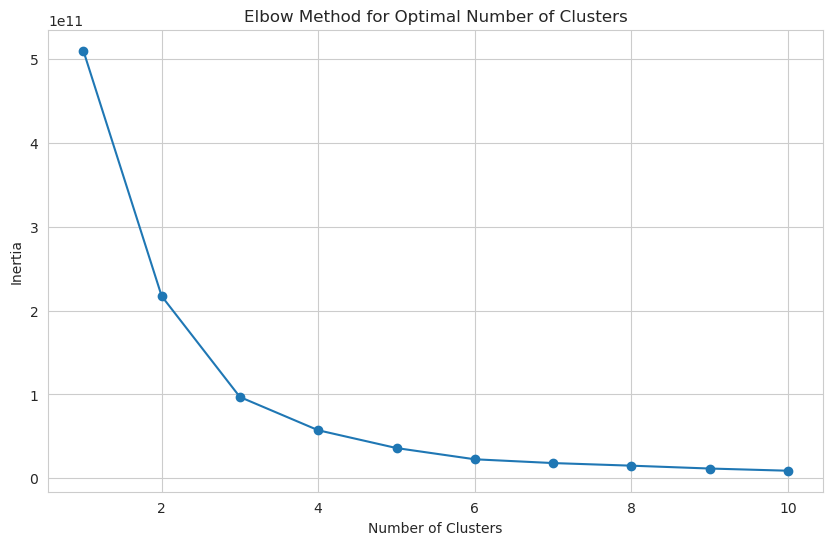

In [145]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [146]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)

In [148]:
labels_3 = kmeans_3.fit_predict(X_clustering)
labels_4 = kmeans_4.fit_predict(X_clustering)

/home/vulcan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vulcan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [149]:
silhouette_score_3 = silhouette_score(X_clustering, labels_3)
silhouette_score_4 = silhouette_score(X_clustering, labels_4)

In [150]:
df_clean['Cluster_3'] = labels_3
df_clean['Cluster_4'] = labels_4

In [159]:
df_clean = df_clean.reset_index(drop=True)

df_clean

NEIGHBORHOOD  BUILDING CLASS CATEGORY  TAX CLASS AT PRESENT  BLOCK  \
0              0.0                      2.0                   0.0    377   
1              0.0                      3.0                   1.0    375   
2              0.0                      3.0                   1.0    376   
3              0.0                      3.0                   3.0    385   
4              0.0                      3.0                   1.0    391   
...            ...                      ...                   ...    ...   
1120          35.0                      4.0                   1.0   2175   
1121          35.0                      4.0                   1.0   2177   
1122          35.0                      4.0                   1.0   2177   
1123          35.0                      4.0                   1.0   2180   
1124          35.0                      9.0                   1.0   2180   

       LOT  BUILDING CLASS AT PRESENT  ADDRESS  ZIP CODE  RESIDENTIAL UNITS  \
0       66                        9.0    490.0     10009                3.0   
1       62                       13.0   1009.0     10009               20.0   
2       30                       13.0    547.0     10009               13.0   
3        1                       16.0    267.0     10009                7.0   
4       55                       13.0    595.0     10009               17.0   
...    ...                        ...      ...       ...                ...   
1120    33                       24.0    832.0     10040               50.0   
1121     8                       18.0    317.0     10033               54.0   
1122    39                       18.0     81.0     10033               61.0   
1123   505                       24.0    803.0     10040               25.0   
1124  1007                       36.0      0.0     10033               65.0   

      COMMERCIAL UNITS  ...  TOTAL_UNITS_VS_RES_UNITS  \
0                    0  ...                       0.0   
1                    0  ...                       0.0   
2                    0  ...                       0.0   
3                    1  ...                       1.0   
4                    0  ...                       0.0   
...                ...  ...                       ...   
1120                 2  ...                       2.0   
1121                 0  ...                       0.0   
1122                 0  ...                       0.0   
1123                 2  ...                       2.0   
1124                 0  ...                       0.0   

      TOTAL_UNITS_VS_COM_UNITS  DIFF_LAND_GROSS_SQFT  SALE_DATE  \
0                          3.0                 703.0 2013-03-06   
1                         20.0                6919.0 2012-09-06   
2                         13.0               10276.0 2012-10-25   
3                          7.0                3759.0 2013-04-18   
4                         17.0                6907.0 2012-10-16   
...                        ...                   ...        ...   
1120                      50.0               40328.0 2013-05-30   
1121                      54.0               43748.0 2013-01-24   
1122                      61.0               42174.0 2013-01-24   
1123                      25.0               15988.0 2013-05-14   
1124                      65.0               28270.0 2013-04-30   

      MONTH_OF_SALE  YEAR_OF_SALE  DAY_OF_WEEK_OF_SALE STREET_NAME  Cluster_3  \
0                 3          2013                  6.0        45.0          1   
1                 9          2012                  4.0        45.0          1   
2                10          2012                  4.0        49.0          1   
3                 4          2013                  4.0        11.0          1   
4                10          2012                  5.0        45.0          1   
...             ...           ...                  ...         ...        ...   
1120              5          2013                  4.0        25.0          0   
1121  

In [152]:
from sklearn.decomposition import PCA

In [153]:
pca = PCA(n_components=2)

In [155]:
numerical_features = df_clean.select_dtypes(include=['number']).columns.tolist()
principal_components = pca.fit_transform(df_clean[numerical_features])
principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

In [160]:
principal_df['Cluster_K3'] = df_clean['Cluster_3']
principal_df['Cluster_K4'] = df_clean['Cluster_4']

In [161]:
principal_df

Principal Component 1  Principal Component 2  Cluster_K3  Cluster_K4
0             -1.228217e+06           -8912.573076           1           1
1             -7.282141e+05           -2926.066778           1           1
2             -3.482962e+06            1695.370125           1           1
3             -4.377932e+06           -4410.701243           1           1
4             -8.782141e+05           -2869.210375           1           1
...                     ...                    ...         ...         ...
1120           6.981800e+06           26951.351125           0           0
1121           3.271802e+06           32074.324642           0           0
1122           4.671801e+06           29857.689196           0           0
1123          -1.178210e+06            6357.956668           1           1
1124           6.621795e+06           15059.678551           0           0

[1125 rows x 4 columns]

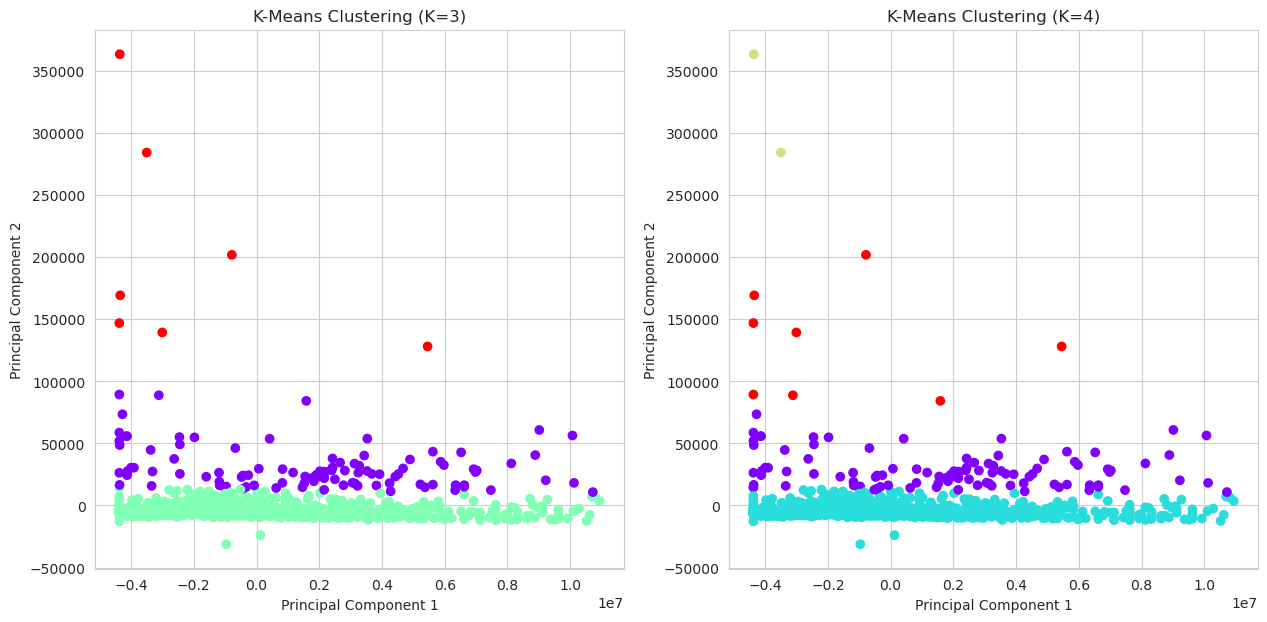

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=principal_df['Cluster_K3'], cmap='rainbow')
ax[0].set_title('K-Means Clustering (K=3)')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

ax[1].scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=principal_df['Cluster_K4'], cmap='rainbow')
ax[1].set_title('K-Means Clustering (K=4)')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

plt.show()

In [164]:
cluster_summary = df_clean.groupby('Cluster_3').mean()

print(cluster_summary.transpose())

Cluster_3                                                   0  \
NEIGHBORHOOD                                        23.380952   
BUILDING CLASS CATEGORY                              4.152381   
TAX CLASS AT PRESENT                                  1.07619   
BLOCK                                             1885.038095   
LOT                                                120.590476   
BUILDING CLASS AT PRESENT                           19.942857   
ADDRESS                                            613.733333   
ZIP CODE                                         10029.847619   
RESIDENTIAL UNITS                                        49.4   
COMMERCIAL UNITS                                     1.361905   
TOTAL UNITS                                         50.761905   
LAND SQUARE FEET                                     1.906915   
GROSS SQUARE FEET                                    1.587041   
YEAR BUILT                                        1928.952381   
TAX CLASS AT TIME OF SALE

In [169]:
df_clean.dtypes

NEIGHBORHOOD                             float64
BUILDING CLASS CATEGORY                  float64
TAX CLASS AT PRESENT                     float64
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                float64
ADDRESS                                  float64
ZIP CODE                                   int64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                           int64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE           float64
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
LOG_SALE_PRICE                           float64
NORM_LOG_SALE_PRICE                      float64
AGE_OF_BUILDING     

In [170]:
for cluster in df_clean['Cluster_3'].unique():
    print(f"Building model for Cluster 3")
    
    cluster_data = df_clean[df_clean['Cluster_3'] == cluster]
    
    X = cluster_data.drop(['SALE PRICE', 'SALE DATE', 'LOG_SALE_PRICE', 'NORM_LOG_SALE_PRICE', 'Cluster_3','SALE_DATE'], axis=1)
    y = cluster_data['SALE PRICE']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error for Cluster 3: {mse}")
    print(f"R2 for Cluster 3: {r2}")

Building model for Cluster 3
Mean Squared Error for Cluster 3: 5995535313231.539
R2 for Cluster 3: 0.4252791459325389
Building model for Cluster 3
Mean Squared Error for Cluster 3: 16574954137394.408
R2 for Cluster 3: 0.1368960860539037
Building model for Cluster 3
Mean Squared Error for Cluster 3: 10385417483296.152
R2 for Cluster 3: -53.258631687491665
